In [162]:
# Install Gdal - rtree pre-req
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install geopandas
!pip install mapclassify
!pip install libpysal
!pip install rasterio
!pip install contextily
!pip install mpl_interaction
!pip install esda
!pip install --upgrade xlrd
!pip install chart_studio

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.9.4-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Lo

In [163]:
import pandas as pd
import geopandas as gpd
import libpysal as lp
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import rasterio as rio
import chart_studio.plotly as py
import numpy as np
import contextily as ctx
import shapely.geometry as geom
import plotly.express as px
import requests
import datetime
import esda 
import mapclassify as mc
import os
import cufflinks as cf
from IPython.display import display, HTML
import plotly.offline as pyo
%matplotlib inline


In [164]:
carpeta_ficheros_input="/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/analisis_geoespacial/data"
carpeta_ficheros_input

'/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/analisis_geoespacial/data'

In [165]:
def ine_request(ine_code):
    resultados = 999
    path_template = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{cod_serie}?nult={n_ult_datos}'
    path = path_template.format(cod_serie=ine_code, n_ult_datos=resultados)
    json_request = requests.get(path).json()
     
    return json_request

df_codigos = pd.read_excel('/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/ine3.xlsx')
codigos = df_codigos['ine_code'].tolist()


anyo_lista = list()
variable_lista = list()
valor_lista = list()

for codigo in codigos:
    datos = ine_request(codigo)
    

     
    nombre_variable = datos['Nombre']
    for dato in datos['Data']:
        fecha = datetime.date.fromtimestamp(dato['Fecha'] // 1000)
        anyo = fecha.year
        valor = dato['Valor']
 
        anyo_lista.append(anyo)
        variable_lista.append(nombre_variable)
        valor_lista.append(valor)

df = pd.DataFrame({
        'Año' : anyo_lista,
        'Dato' : variable_lista,
        'Población' : valor_lista
    })

In [166]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Crear un nuevo DataFrame vacío con 16 columnas
new_df1 = pd.DataFrame(columns=years)

# Iterar sobre las filas del DataFrame original
for index, row in df.iterrows():
    # Obtener el dato y la población de cada fila
    dato = row['Dato']
    poblacion = row['Población']
    
    # Agregar el dato y la población en las columnas correspondientes
    for year in years:
        new_df1.loc[index, year] = dato if year == row['Año'] else poblacion

# Mostrar el nuevo DataFrame
#print(new_df1)

In [167]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Obtener los datos de la columna 'Dato' como un arreglo numpy
data = df['Población'].values

# Calcular el número de repeticiones necesarias para llenar el DataFrame
repeticiones = (52 * 17) // len(data) + 1

# Repetir los datos según el número de repeticiones
repeated_data = np.tile(data, repeticiones)[:52 * 17]

# Reformatear los datos en un arreglo bidimensional de 53 filas y 17 columnas
reshaped_data = np.reshape(repeated_data, (52, 17))

# Crear un DataFrame a partir del arreglo reformateado
new_df1 = pd.DataFrame(reshaped_data, columns=years)

# Mostrar el nuevo DataFrame
#print(new_df1)

In [168]:
new_df1
fila = 50
columna = '2014'
nuevo_dato = 232

# Reemplazar los puntos por el nuevo dato
new_df1.at[fila, columna] = nuevo_dato
new_df1

# Crear una columna nueva en new_df1 con valores del 1 al 52
new_df1['indice'] = range(1, 53)
new_df1

new_df1.columns=['2005T', '2006T', '2007T', '2008T', '2009T',
       '2010T', '2011T', '2012T', '2013T', '2014T', '2015T', '2016T', '2017T',
       '2018T', '2019T', '2020T', '2021T', 'indice']

new_df1['indice'] = new_df1['indice'].astype('int64')
new_df1

# Lista de nombres de columnas que deseas eliminar
columnas_eliminar = ['2005T', '2006T', '2007T', '2008T', '2009T',
       '2010T', '2011T', '2012T','2021T']

# Eliminar las columnas de la tabla
new_df1 = new_df1.drop(columns=columnas_eliminar)


In [169]:
def ine_request(ine_code):
    resultados = 999
    path_template = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{cod_serie}?nult={n_ult_datos}'
    path = path_template.format(cod_serie=ine_code, n_ult_datos=resultados)
    json_request = requests.get(path).json()
     
    return json_request

df_codigos = pd.read_excel('/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/ine5.xlsx')
codigos = df_codigos['ine_code'].tolist()

anyo_lista = list()
variable_lista = list()
valor_lista = list()


for codigo in codigos:
    datos = ine_request(codigo)
    

     
    nombre_variable = datos['Nombre']
    for dato in datos['Data']:
        fecha = datetime.date.fromtimestamp(dato['Fecha'] // 1000)
        anyo = fecha.year
        valor = dato['Valor']
 
        anyo_lista.append(anyo)
        variable_lista.append(nombre_variable)
        valor_lista.append(valor)

df2 = pd.DataFrame({
        'Año' : anyo_lista,
        'Dato' : variable_lista,
        'Población' : valor_lista
    })
 


In [170]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Crear un nuevo DataFrame vacío con 16 columnas
new_df2 = pd.DataFrame(columns=years)

# Iterar sobre las filas del DataFrame original
for index, row in df2.iterrows():
    # Obtener el dato y la población de cada fila
    dato = row['Dato']
    poblacion = row['Población']
    
    # Agregar el dato y la población en las columnas correspondientes
    for year in years:
        new_df2.loc[index, year] = dato if year == row['Año'] else poblacion

# Mostrar el nuevo DataFrame
#print(new_df2)

In [171]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Obtener los datos de la columna 'Dato' como un arreglo numpy
data = df2['Población'].values

# Calcular el número de repeticiones necesarias para llenar el DataFrame
repeticiones = (52 * 17) // len(data) + 1

# Repetir los datos según el número de repeticiones
repeated_data = np.tile(data, repeticiones)[:52 * 17]

# Reformatear los datos en un arreglo bidimensional de 52 filas y 17 columnas
reshaped_data = np.reshape(repeated_data, (52, 17))

# Crear un DataFrame a partir del arreglo reformateado
new_df2 = pd.DataFrame(reshaped_data, columns=years)

# Mostrar el nuevo DataFrame
#print(new_df2)

In [172]:
new_df2 
fila= 50
columna='2014'
nuevo_datoN=0

new_df2.at[fila, columna] = nuevo_datoN
new_df2['indice'] = range(1, 53)
new_df2


new_df2.columns=['2005N', '2006N', '2007N', '2008N', '2009N',
       '2010N', '2011N', '2012N', '2013N', '2014N', '2015N', '2016N', '2017N',
       '2018N', '2019N', '2020N', '2021N', 'indice']


new_df2['indice'] = new_df2['indice'].astype('int64')   

columnas_eliminar = ['2005N', '2006N', '2007N', '2008N', '2009N',
       '2010N', '2011N', '2012N','2021N']

# Eliminar las columnas de la tabla
new_df2 = new_df2.drop(columns=columnas_eliminar)


In [173]:
def ine_request(ine_code):
    resultados = 999
    path_template = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{cod_serie}?nult={n_ult_datos}'
    path = path_template.format(cod_serie=ine_code, n_ult_datos=resultados)
    json_request = requests.get(path).json()
     
    return json_request

df_codigos = pd.read_excel('/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/ine4.xlsx')
codigos = df_codigos['ine_code'].tolist()

anyo_lista = list()
variable_lista = list()
valor_lista = list()


for codigo in codigos:
    datos = ine_request(codigo)
    

     
    nombre_variable = datos['Nombre']
    for dato in datos['Data']:
        fecha = datetime.date.fromtimestamp(dato['Fecha'] // 1000)
        anyo = fecha.year
        valor = dato['Valor']
 
        anyo_lista.append(anyo)
        variable_lista.append(nombre_variable)
        valor_lista.append(valor)

df3 = pd.DataFrame({
        'Año' : anyo_lista,
        'Dato' : variable_lista,
        'Población' : valor_lista
    })
 


In [174]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Crear un nuevo DataFrame vacío con 16 columnas
new_df3 = pd.DataFrame(columns=years)

# Iterar sobre las filas del DataFrame original
for index, row in df3.iterrows():
    # Obtener el dato y la población de cada fila
    dato = row['Dato']
    poblacion = row['Población']
    
    # Agregar el dato y la población en las columnas correspondientes
    for year in years:
        new_df3.loc[index, year] = dato if year == row['Año'] else poblacion

# Mostrar el nuevo DataFrame
#print(new_df3)

In [175]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Obtener los datos de la columna 'Dato' como un arreglo numpy
data = df3['Población'].values

# Calcular el número de repeticiones necesarias para llenar el DataFrame
repeticiones = (52 * 17) // len(data) + 1

# Repetir los datos según el número de repeticiones
repeated_data = np.tile(data, repeticiones)[:52 * 17]

# Reformatear los datos en un arreglo bidimensional de 52 filas y 17 columnas
reshaped_data = np.reshape(repeated_data, (52, 17))

# Crear un DataFrame a partir del arreglo reformateado
new_df3 = pd.DataFrame(reshaped_data, columns=years)

# Mostrar el nuevo DataFrame
#print(new_df3)

In [176]:
new_df3
fila= 50
columna='2014'
nuevo_datoS=20

new_df3.at[fila, columna] = nuevo_datoS

new_df3['indice'] = range(1, 53)
new_df3

new_df3.columns=['2005S', '2006S', '2007S', '2008S', '2009S',
       '2010S', '2011S', '2012S', '2013S', '2014S', '2015S', '2016S', '2017S',
       '2018S', '2019S', '2020S', '2021S', 'indice']

new_df3['indice'] = new_df3['indice'].astype('int64')

columnas_eliminar = ['2005S', '2006S', '2007S', '2008S', '2009S',
       '2010S', '2011S', '2012S','2021S']

# Eliminar las columnas de la tabla
new_df3 = new_df3.drop(columns=columnas_eliminar)
#new_df3

In [177]:
def ine_request(ine_code):
    resultados = 999
    path_template = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{cod_serie}?nult={n_ult_datos}'
    path = path_template.format(cod_serie=ine_code, n_ult_datos=resultados)
    json_request = requests.get(path).json()
     
    return json_request

df_codigos = pd.read_excel('/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/ine6.xlsx')
codigos = df_codigos['ine_code'].tolist()

anyo_lista = list()
variable_lista = list()
valor_lista = list()


for codigo in codigos:
    datos = ine_request(codigo)
    

     
    nombre_variable = datos['Nombre']
    for dato in datos['Data']:
        fecha = datetime.date.fromtimestamp(dato['Fecha'] // 1000)
        anyo = fecha.year
        valor = dato['Valor']
 
        anyo_lista.append(anyo)
        variable_lista.append(nombre_variable)
        valor_lista.append(valor)

df5 = pd.DataFrame({
        'Año' : anyo_lista,
        'Dato' : variable_lista,
        'Población' : valor_lista
    })
 


In [178]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Crear un nuevo DataFrame vacío con 16 columnas
new_df5 = pd.DataFrame(columns=years)

# Iterar sobre las filas del DataFrame original
for index, row in df5.iterrows():
    # Obtener el dato y la población de cada fila
    dato = row['Dato']
    poblacion = row['Población']
    
    # Agregar el dato y la población en las columnas correspondientes
    for year in years:
        new_df5.loc[index, year] = dato if year == row['Año'] else poblacion

# Mostrar el nuevo DataFrame
#print(new_df5)

In [179]:
# Crear una lista de años de 2004 a 2020
years = [str(year) for year in range(2004, 2021)]

# Obtener los datos de la columna 'Dato' como un arreglo numpy
data = df5['Población'].values

# Calcular el número de repeticiones necesarias para llenar el DataFrame
repeticiones = (52 * 17) // len(data) + 1

# Repetir los datos según el número de repeticiones
repeated_data = np.tile(data, repeticiones)[:52 * 17]

# Reformatear los datos en un arreglo bidimensional de 52 filas y 17 columnas
reshaped_data = np.reshape(repeated_data, (52, 17))

# Crear un DataFrame a partir del arreglo reformateado
new_df5 = pd.DataFrame(reshaped_data, columns=years)

# Mostrar el nuevo DataFrame
#print(new_df5)

In [180]:
new_df5
fila= 50
columna='2014'
nuevo_datoD=212

new_df5.at[fila, columna] = nuevo_datoD
new_df5
new_df5['indice'] = range(1, 53)
new_df5

new_df5.columns=['2005D', '2006D', '2007D', '2008D', '2009D',
       '2010D', '2011D', '2012D', '2013D', '2014D', '2015D', '2016D', '2017D',
       '2018D', '2019D', '2020D', '2021D', 'indice']

new_df5['indice'] = new_df5['indice'].astype('int64')

columnas_eliminar = ['2005D', '2006D', '2007D', '2008D', '2009D',
       '2010D', '2011D', '2012D','2021D']

# Eliminar las columnas de la tabla
new_df5 = new_df5.drop(columns=columnas_eliminar)


In [181]:
# Unir los DataFrames df1, df2, df3 y df4 en base a la columna clave
datos = new_df1.merge(new_df2, on='indice').merge(new_df3, on='indice').merge(new_df5, on='indice')
datos

2013T    2014T    2015T    2016T    2017T    2018T    2019T    2020T  \
0     685.0    681.0    860.0    754.0    760.0    664.0    605.0    398.0   
1    3834.0   4242.0   3913.0   4262.0   4046.0   3973.0   3707.0   3346.0   
2    1331.0   1373.0   1458.0   1470.0   1491.0   1485.0   1721.0   1322.0   
3     585.0    607.0    565.0    678.0    587.0    547.0    520.0    465.0   
4    2361.0   2607.0   2389.0   2408.0   2363.0   2186.0   2182.0   1784.0   
5     217.0    218.0    182.0    222.0    241.0    243.0    227.0    154.0   
6    1050.0   1304.0   1271.0   1208.0   1221.0   1216.0   1230.0   1022.0   
7    2500.0   2510.0   2503.0   2539.0   2694.0   2596.0   2523.0   2248.0   
8   13847.0  14497.0  14236.0  14016.0  13597.0  13423.0  13016.0  10388.0   
9    1971.0   2133.0   2164.0   2133.0   2226.0   2245.0   2542.0   2003.0   
10    555.0    626.0    628.0    564.0    580.0    568.0    470.0    437.0   
11    523.0    694.0    707.0    683.0    719.0    716.0    626.0    515.0   
12   2523.0   2657.0   2494.0   2415.0   2569.0   2631.0   2474.0   2048.0   
13   1193.0   1303.0   1375.0   1231.0   1344.0   1236.0   1239.0   1027.0   
14   1170.0   1324.0   1138.0   1456.0   1211.0   1423.0   1353.0   1124.0   
15    948.0    962.0    987.0    880.0    960.0    871.0    881.0    739.0   
16   1552.0   1825.0   1739.0   1590.0   1520.0   1502.0   1441.0   1351.0   
17   2430.0   2533.0   2418.0   2406.0   2412.0   2325.0   2050.0   1538.0   
18    364.0    321.0    376.0    298.0    274.0    273.0    273.0    208.0   
19   1201.0   1341.0   1303.0   1196.0   1192.0   1223.0   1252.0    986.0   
20   1734.0   1647.0   1717.0   1618.0   1735.0   1620.0   1585.0   1301.0   
21   1931.0   1988.0   1977.0   2046.0   2086.0   1808.0   1697.0   1402.0   
22    428.0    530.0    610.0    560.0    521.0    773.0    878.0    670.0   
23   1063.0   1201.0   1066.0   1108.0   1093.0   1014.0   1032.0    851.0   
24    409.0    458.0    505.0    375.0    392.0    412.0    397.0    292.0   
25   1246.0   1256.0   1279.0   1195.0   1208.0   1195.0   1234.0    925.0   
26    954.0    956.0    812.0    853.0    872.0    938.0    923.0    798.0   
27   1006.0   1435.0   1013.0    942.0    931.0    817.0    843.0    789.0   
28    458.0    580.0    600.0    512.0    525.0    446.0    505.0    408.0   
29  13913.0  15256.0  13785.0  13809.0  14668.0  13451.0  13001.0  10421.0   
30   3770.0   3782.0   3742.0   3833.0   3817.0   3855.0   3999.0   3152.0   
31   2972.0   3103.0   2893.0   3057.0   3210.0   3061.0   2801.0   2602.0   
32   1102.0   1327.0   1184.0   1222.0   1414.0   1283.0   1189.0   1076.0   
33    642.0    686.0    705.0    673.0    667.0    491.0    539.0    509.0   
34    260.0    271.0    272.0    263.0    264.0    243.0    273.0    242.0   
35   3172.0   2797.0   2553.0   2518.0   2652.0   2639.0   2172.0   1927.0   
36   2022.0   2149.0   2032.0   1935.0   2010.0   1906.0   1701.0   1504.0   
37    633.0    731.0    601.0    662.0    605.0    623.0    566.0    580.0   
38    614.0    610.0    660.0    610.0    577.0    571.0    479.0    473.0   
39   3191.0   2778.0   2610.0   2637.0   2656.0   2444.0   2386.0   2166.0   
40    205.0    239.0    213.0    236.0    211.0    244.0    254.0    201.0   
41   4061.0   4365.0   4204.0   4229.0   4511.0   4283.0   4224.0   3516.0   
42    126.0    167.0    101.0    106.0     99.0     94.0     95.0     88.0   
43   1997.0   2012.0   1932.0   2056.0   1957.0   1844.0   1260.0   1468.0   
44    177.0    211.0    244.0    230.0    166.0    188.0    196.0    150.0   
45   1112.0   1221.0   1349.0   1312.0   1413.0   1391.0   1322.0   1342.0   
46   7056.0   6822.0   6363.0   6746.0   6607.0   6698.0   6210.0   5292.0   
47    996.0   1012.0    939.0    999.0    984.0   1082.0   1204.0   1029.0   
48    247.0    279.0    256.0    250.0    249.0    247.0    243.0    210.0   
49   1673.0   1829.0   2235.0   1882.0   1831.0   2063.0   1531.0   1224.0   
50    233.0    236.0    232.

In [182]:
datosmunicipios = pd.read_excel('/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/Poblacion_TFG.xlsx');datosmunicipios



datosmunicipios.dropna(axis=1, how='all', inplace=True);datosmunicipios

CCAA         Provincia  Anyo    Total  Hombres  \
0      08_Castilla-La Mancha          Albacete  2020   389874   194824   
1    10_Comunitat Valenciana  Alicante/Alacant  2020  1885559   935186   
2               01_Andalucía           Almería  2020   715665   362146   
3              17_País Vasco       Araba/Álava  2020   329873   161483   
4                03_Asturias          Asturias  2020  1018899   487029   
..                       ...               ...   ...      ...      ...   
411       07_Castilla y León        Valladolid  2013   531141   260366   
412       07_Castilla y León            Zamora  2013   189042    93947   
413                02_Aragón          Zaragoza  2013   972508   479590   
414       18_Ceuta y Melilla             Ceuta  2013    84534    43323   
415       18_Ceuta y Melilla           Melilla  2013    83619    43113   

     Mujeres  
0     195050  
1     950373  
2     353520  
3     168390  
4     531871  
..       ...  
411   270775  
412    95095  
413   492917  
414    41211  
415    40506  

[416 rows x 6 columns]

In [183]:

# Crear una lista con el orden personalizado de las provincias
orden_provincias = ['Albacete','Alicante/Alacant','Almería','Araba/Álava','Asturias','Ávila','Badajoz','Balears, Illes', 'Barcelona', 'Bizkaia', 'Burgos', 'Cáceres', 'Cádiz',
                    'Cantabria', 'Castellón/Castelló', 'Ciudad Real', 'Córdoba', 'Coruña, A',
                    'Cuenca', 'Gipuzkoa', 'Girona', 'Granada', 'Guadalajara', 'Huelva',
                    'Huesca', 'Jaén', 'León', 'Lleida', 'Lugo', 'Madrid', 'Málaga',
                    'Murcia', 'Navarra', 'Ourense', 'Palencia', 'Palmas, Las', 'Pontevedra',
                    'Rioja, La', 'Salamanca', 'Santa Cruz de Tenerife', 'Segovia', 'Sevilla',
                    'Soria', 'Tarragona', 'Teruel', 'Toledo', 'Valencia/València', 'Valladolid',
                    'Zamora', 'Zaragoza', 'Ceuta', 'Melilla']  # Reemplaza con el orden deseado

# Convertir la columna "Provincia" en una categoría con el orden personalizado
datosmunicipios['Provincia'] = pd.Categorical(datosmunicipios['Provincia'], categories=orden_provincias, ordered=True)
datosmunicipios

# Realizar la operación de pivot
pivot_table3 = datosmunicipios.pivot_table(index='Provincia', columns='Anyo', values='Total')

# Mostrar la tabla pivotada con el orden deseado
print(pivot_table3)


Anyo                       2013     2014     2015     2016     2017     2018  \
Provincia                                                                      
Albacete                 399510   396684   394928   392958   391574   390337   
Alicante/Alacant        1854244  1850624  1842174  1842446  1842572  1845470   
Almería                  691680   688888   691155   696186   700041   701069   
Araba/Álava              319927   319895   320663   321804   323812   325739   
Asturias                1067802  1058975  1049875  1040925  1034277  1027624   
Ávila                    169458   167331   165741   163650   161749   160032   
Badajoz                  690894   688647   686092   682572   678473   674926   
Balears, Illes          1110115  1115841  1124972  1135527  1150935  1166923   
Barcelona               5493078  5445617  5432802  5445904  5474381  5514880   
Bizkaia                 1148871  1140285  1137120  1134370  1134491  1134848   
Burgos                   368701   365296

In [184]:
pivot_table3 = datosmunicipios.pivot(index='Provincia', columns='Anyo', values='Total')
pivot_table3

Anyo                       2013     2014     2015     2016     2017     2018  \
Provincia                                                                      
Albacete                 399510   396684   394928   392958   391574   390337   
Alicante/Alacant        1854244  1850624  1842174  1842446  1842572  1845470   
Almería                  691680   688888   691155   696186   700041   701069   
Araba/Álava              319927   319895   320663   321804   323812   325739   
Asturias                1067802  1058975  1049875  1040925  1034277  1027624   
Ávila                    169458   167331   165741   163650   161749   160032   
Badajoz                  690894   688647   686092   682572   678473   674926   
Balears, Illes          1110115  1115841  1124972  1135527  1150935  1166923   
Barcelona               5493078  5445617  5432802  5445904  5474381  5514880   
Bizkaia                 1148871  1140285  1137120  1134370  1134491  1134848   
Burgos                   368701   365296   362913   359872   357616   356080   
Cáceres                  410074   407774   405531   402397   399033   395528   
Cádiz                   1247578  1247552  1248584  1248241  1248958  1249245   
Cantabria                590037   587682   585359   582504   581476   581294   
Castellón/Castelló       585729   578213   574460   571223   570170   569576   
Ciudad Real              522749   518051   514143   508409   504117   498549   
Córdoba                  800414   797769   795703   792412   789981   786524   
Coruña, A               1138494  1133330  1128694  1124114  1121746  1121417   
Cuenca                   211796   208663   206594   204000   202037   200596   
Gipuzkoa                 708207   706986   707316   707892   708979   710281   
Girona                   749191   743124   740373   741608   745244   749656   
Granada                  922138   920484   919139   917494   917039   917445   
Guadalajara              257101   255240   254558   254280   255332   256029   
Huelva                   520948   521428   522136   521648   521110   522484   
Huesca                   224688   223358   222084   220588   219669   219174   
Jaén                     661716   656132   652132   646500   641816   636586   
León                     489239   484532   480331   474896   470327   466108   
Lleida                   435847   432169   430661   429108   428893   429212   
Lugo                     344845   341822   338921   336136   333593   331492   
Madrid                  6414709  6378297  6385298  6424275  6476705  6549519   
Málaga                  1611983  1619714  1631357  1640572  1646714  1651506   
Murcia                  1461987  1461803  1463773  1466474  1472977  1475569   
Navarra                  638949   636450   636402   637486   640337   643866   
Ourense                  325389   321801   318739   314663   311562   309314   
Palencia                 168749   167301   165806   164249   163007   161795   
Palmas, Las             1098235  1100714  1106236  1110884  1119150  1126896   
Pontevedra               953241   950273   948302   945189   943228   940926   
Rioja, La                318639   315223   313569   312810   312618   312884   
Salamanca                347249   344395   342001   338553   336087   333649   
Santa Cruz de Tenerife  1006997  1014131  1019907  1024324  1035774  1050152   
Segovia                  161374   159127   157938   156359   155307   154387   
Sevilla                 1936703  1936908  1939412  1940721  1943166  1945236   
Soria                     93575    92630    91780    90745    90010    89738   
Tarragona                802806   795328   793155   791670   792622   794969   
Teruel                   141113   139390   137715   136043   134872   133850   
Toledo                   703236   696560   692544   689253   687879   687084   
Valencia/València       2547044  2527590  2523040  2518679  2522342  2531188   
Valladolid               531141   528675   527395   524820   523207   520835   


In [185]:


#2020
columna_2020 = pivot_table3[2020].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2020M"] = (datos["2020T"]/columna_2020)*10000
datos




#2019
columna_2019 = pivot_table3[2019].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2019M"] = (datos["2019T"]/columna_2019)*10000
datos


#2018
columna_2018 = pivot_table3[2018].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2018M"] = (datos["2018T"]/columna_2018)*10000
datos






#2017
columna_2017 = pivot_table3[2017].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2017M"] = (datos["2017T"]/columna_2017)*10000
datos




#2016
columna_2016 = pivot_table3[2016].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2016M"] = (datos["2016T"]/columna_2016)*10000
datos




#2015
columna_2015 = pivot_table3[2015].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2015M"] = (datos["2015T"]/columna_2015)*10000
datos



#2014
columna_2014 = pivot_table3[2014].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2014M"] = (datos["2014T"]/columna_2014)*10000
datos




#2013
columna_2013 = pivot_table3[2013].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2013M"] = (datos["2013T"]/columna_2013)*10000
datos









2013T    2014T    2015T    2016T    2017T    2018T    2019T    2020T  \
0     685.0    681.0    860.0    754.0    760.0    664.0    605.0    398.0   
1    3834.0   4242.0   3913.0   4262.0   4046.0   3973.0   3707.0   3346.0   
2    1331.0   1373.0   1458.0   1470.0   1491.0   1485.0   1721.0   1322.0   
3     585.0    607.0    565.0    678.0    587.0    547.0    520.0    465.0   
4    2361.0   2607.0   2389.0   2408.0   2363.0   2186.0   2182.0   1784.0   
5     217.0    218.0    182.0    222.0    241.0    243.0    227.0    154.0   
6    1050.0   1304.0   1271.0   1208.0   1221.0   1216.0   1230.0   1022.0   
7    2500.0   2510.0   2503.0   2539.0   2694.0   2596.0   2523.0   2248.0   
8   13847.0  14497.0  14236.0  14016.0  13597.0  13423.0  13016.0  10388.0   
9    1971.0   2133.0   2164.0   2133.0   2226.0   2245.0   2542.0   2003.0   
10    555.0    626.0    628.0    564.0    580.0    568.0    470.0    437.0   
11    523.0    694.0    707.0    683.0    719.0    716.0    626.0    515.0   
12   2523.0   2657.0   2494.0   2415.0   2569.0   2631.0   2474.0   2048.0   
13   1193.0   1303.0   1375.0   1231.0   1344.0   1236.0   1239.0   1027.0   
14   1170.0   1324.0   1138.0   1456.0   1211.0   1423.0   1353.0   1124.0   
15    948.0    962.0    987.0    880.0    960.0    871.0    881.0    739.0   
16   1552.0   1825.0   1739.0   1590.0   1520.0   1502.0   1441.0   1351.0   
17   2430.0   2533.0   2418.0   2406.0   2412.0   2325.0   2050.0   1538.0   
18    364.0    321.0    376.0    298.0    274.0    273.0    273.0    208.0   
19   1201.0   1341.0   1303.0   1196.0   1192.0   1223.0   1252.0    986.0   
20   1734.0   1647.0   1717.0   1618.0   1735.0   1620.0   1585.0   1301.0   
21   1931.0   1988.0   1977.0   2046.0   2086.0   1808.0   1697.0   1402.0   
22    428.0    530.0    610.0    560.0    521.0    773.0    878.0    670.0   
23   1063.0   1201.0   1066.0   1108.0   1093.0   1014.0   1032.0    851.0   
24    409.0    458.0    505.0    375.0    392.0    412.0    397.0    292.0   
25   1246.0   1256.0   1279.0   1195.0   1208.0   1195.0   1234.0    925.0   
26    954.0    956.0    812.0    853.0    872.0    938.0    923.0    798.0   
27   1006.0   1435.0   1013.0    942.0    931.0    817.0    843.0    789.0   
28    458.0    580.0    600.0    512.0    525.0    446.0    505.0    408.0   
29  13913.0  15256.0  13785.0  13809.0  14668.0  13451.0  13001.0  10421.0   
30   3770.0   3782.0   3742.0   3833.0   3817.0   3855.0   3999.0   3152.0   
31   2972.0   3103.0   2893.0   3057.0   3210.0   3061.0   2801.0   2602.0   
32   1102.0   1327.0   1184.0   1222.0   1414.0   1283.0   1189.0   1076.0   
33    642.0    686.0    705.0    673.0    667.0    491.0    539.0    509.0   
34    260.0    271.0    272.0    263.0    264.0    243.0    273.0    242.0   
35   3172.0   2797.0   2553.0   2518.0   2652.0   2639.0   2172.0   1927.0   
36   2022.0   2149.0   2032.0   1935.0   2010.0   1906.0   1701.0   1504.0   
37    633.0    731.0    601.0    662.0    605.0    623.0    566.0    580.0   
38    614.0    610.0    660.0    610.0    577.0    571.0    479.0    473.0   
39   3191.0   2778.0   2610.0   2637.0   2656.0   2444.0   2386.0   2166.0   
40    205.0    239.0    213.0    236.0    211.0    244.0    254.0    201.0   
41   4061.0   4365.0   4204.0   4229.0   4511.0   4283.0   4224.0   3516.0   
42    126.0    167.0    101.0    106.0     99.0     94.0     95.0     88.0   
43   1997.0   2012.0   1932.0   2056.0   1957.0   1844.0   1260.0   1468.0   
44    177.0    211.0    244.0    230.0    166.0    188.0    196.0    150.0   
45   1112.0   1221.0   1349.0   1312.0   1413.0   1391.0   1322.0   1342.0   
46   7056.0   6822.0   6363.0   6746.0   6607.0   6698.0   6210.0   5292.0   
47    996.0   1012.0    939.0    999.0    984.0   1082.0   1204.0   1029.0   
48    247.0    279.0    256.0    250.0    249.0    247.0    243.0    210.0   
49   1673.0   1829.0   2235.0   1882.0   1831.0   2063.0   1531.0   1224.0   
50    233.0    236.0    232.

In [186]:
#SEPARACIONES

#2020
columna_2020 = pivot_table3[2020].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2020SM"] = (datos["2020S"]/columna_2020)*10000
datos


#2019


columna_2019 = pivot_table3[2019].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2019SM"] = (datos["2019S"]/columna_2019)*10000
datos


#2018

columna_2018 = pivot_table3[2018].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2018SM"] = (datos["2018S"]/columna_2018)*10000
datos



#2017
columna_2017 = pivot_table3[2017].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2017SM"] = (datos["2017S"]/columna_2017)*10000
datos



#2016
columna_2016 = pivot_table3[2016].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2016SM"] = (datos["2016S"]/columna_2016)*10000
datos



#2015

columna_2015 = pivot_table3[2015].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2015SM"] = (datos["2015S"]/columna_2015)*10000
datos




#2014
columna_2014 = pivot_table3[2014].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2014SM"] = (datos["2014S"]/columna_2014)*10000
datos



#2013

columna_2013 = pivot_table3[2013].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2013SM"] = (datos["2013S"]/columna_2013)*10000
datos



2013T    2014T    2015T    2016T    2017T    2018T    2019T    2020T  \
0     685.0    681.0    860.0    754.0    760.0    664.0    605.0    398.0   
1    3834.0   4242.0   3913.0   4262.0   4046.0   3973.0   3707.0   3346.0   
2    1331.0   1373.0   1458.0   1470.0   1491.0   1485.0   1721.0   1322.0   
3     585.0    607.0    565.0    678.0    587.0    547.0    520.0    465.0   
4    2361.0   2607.0   2389.0   2408.0   2363.0   2186.0   2182.0   1784.0   
5     217.0    218.0    182.0    222.0    241.0    243.0    227.0    154.0   
6    1050.0   1304.0   1271.0   1208.0   1221.0   1216.0   1230.0   1022.0   
7    2500.0   2510.0   2503.0   2539.0   2694.0   2596.0   2523.0   2248.0   
8   13847.0  14497.0  14236.0  14016.0  13597.0  13423.0  13016.0  10388.0   
9    1971.0   2133.0   2164.0   2133.0   2226.0   2245.0   2542.0   2003.0   
10    555.0    626.0    628.0    564.0    580.0    568.0    470.0    437.0   
11    523.0    694.0    707.0    683.0    719.0    716.0    626.0    515.0   
12   2523.0   2657.0   2494.0   2415.0   2569.0   2631.0   2474.0   2048.0   
13   1193.0   1303.0   1375.0   1231.0   1344.0   1236.0   1239.0   1027.0   
14   1170.0   1324.0   1138.0   1456.0   1211.0   1423.0   1353.0   1124.0   
15    948.0    962.0    987.0    880.0    960.0    871.0    881.0    739.0   
16   1552.0   1825.0   1739.0   1590.0   1520.0   1502.0   1441.0   1351.0   
17   2430.0   2533.0   2418.0   2406.0   2412.0   2325.0   2050.0   1538.0   
18    364.0    321.0    376.0    298.0    274.0    273.0    273.0    208.0   
19   1201.0   1341.0   1303.0   1196.0   1192.0   1223.0   1252.0    986.0   
20   1734.0   1647.0   1717.0   1618.0   1735.0   1620.0   1585.0   1301.0   
21   1931.0   1988.0   1977.0   2046.0   2086.0   1808.0   1697.0   1402.0   
22    428.0    530.0    610.0    560.0    521.0    773.0    878.0    670.0   
23   1063.0   1201.0   1066.0   1108.0   1093.0   1014.0   1032.0    851.0   
24    409.0    458.0    505.0    375.0    392.0    412.0    397.0    292.0   
25   1246.0   1256.0   1279.0   1195.0   1208.0   1195.0   1234.0    925.0   
26    954.0    956.0    812.0    853.0    872.0    938.0    923.0    798.0   
27   1006.0   1435.0   1013.0    942.0    931.0    817.0    843.0    789.0   
28    458.0    580.0    600.0    512.0    525.0    446.0    505.0    408.0   
29  13913.0  15256.0  13785.0  13809.0  14668.0  13451.0  13001.0  10421.0   
30   3770.0   3782.0   3742.0   3833.0   3817.0   3855.0   3999.0   3152.0   
31   2972.0   3103.0   2893.0   3057.0   3210.0   3061.0   2801.0   2602.0   
32   1102.0   1327.0   1184.0   1222.0   1414.0   1283.0   1189.0   1076.0   
33    642.0    686.0    705.0    673.0    667.0    491.0    539.0    509.0   
34    260.0    271.0    272.0    263.0    264.0    243.0    273.0    242.0   
35   3172.0   2797.0   2553.0   2518.0   2652.0   2639.0   2172.0   1927.0   
36   2022.0   2149.0   2032.0   1935.0   2010.0   1906.0   1701.0   1504.0   
37    633.0    731.0    601.0    662.0    605.0    623.0    566.0    580.0   
38    614.0    610.0    660.0    610.0    577.0    571.0    479.0    473.0   
39   3191.0   2778.0   2610.0   2637.0   2656.0   2444.0   2386.0   2166.0   
40    205.0    239.0    213.0    236.0    211.0    244.0    254.0    201.0   
41   4061.0   4365.0   4204.0   4229.0   4511.0   4283.0   4224.0   3516.0   
42    126.0    167.0    101.0    106.0     99.0     94.0     95.0     88.0   
43   1997.0   2012.0   1932.0   2056.0   1957.0   1844.0   1260.0   1468.0   
44    177.0    211.0    244.0    230.0    166.0    188.0    196.0    150.0   
45   1112.0   1221.0   1349.0   1312.0   1413.0   1391.0   1322.0   1342.0   
46   7056.0   6822.0   6363.0   6746.0   6607.0   6698.0   6210.0   5292.0   
47    996.0   1012.0    939.0    999.0    984.0   1082.0   1204.0   1029.0   
48    247.0    279.0    256.0    250.0    249.0    247.0    243.0    210.0   
49   1673.0   1829.0   2235.0   1882.0   1831.0   2063.0   1531.0   1224.0   
50    233.0    236.0    232.

In [187]:
#DIVORCIOS

#2020
columna_2020 = pivot_table3[2020].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2020DM"] = (datos["2020D"]/columna_2020)*10000
datos



#2019


columna_2019 = pivot_table3[2019].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2019DM"] = (datos["2019D"]/columna_2018)*10000
datos




#2018

columna_2018 = pivot_table3[2018].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2018DM"] = (datos["2018D"]/columna_2018)*10000
datos



#2017

columna_2017 = pivot_table3[2017].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2017DM"] = (datos["2017D"]/columna_2017)*10000
datos




#2016
columna_2016 = pivot_table3[2016].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2016DM"] = (datos["2016D"]/columna_2016)*10000
datos




#2015
columna_2015 = pivot_table3[2015].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2015DM"] = (datos["2015D"]/columna_2015)*10000
datos



#2014
columna_2014 = pivot_table3[2014].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2014DM"] = (datos["2014D"]/columna_2014)*10000
datos



#2013
columna_2013 = pivot_table3[2013].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2013DM"] = (datos["2013D"]/columna_2013)*10000
datos






2013T    2014T    2015T    2016T    2017T    2018T    2019T    2020T  \
0     685.0    681.0    860.0    754.0    760.0    664.0    605.0    398.0   
1    3834.0   4242.0   3913.0   4262.0   4046.0   3973.0   3707.0   3346.0   
2    1331.0   1373.0   1458.0   1470.0   1491.0   1485.0   1721.0   1322.0   
3     585.0    607.0    565.0    678.0    587.0    547.0    520.0    465.0   
4    2361.0   2607.0   2389.0   2408.0   2363.0   2186.0   2182.0   1784.0   
5     217.0    218.0    182.0    222.0    241.0    243.0    227.0    154.0   
6    1050.0   1304.0   1271.0   1208.0   1221.0   1216.0   1230.0   1022.0   
7    2500.0   2510.0   2503.0   2539.0   2694.0   2596.0   2523.0   2248.0   
8   13847.0  14497.0  14236.0  14016.0  13597.0  13423.0  13016.0  10388.0   
9    1971.0   2133.0   2164.0   2133.0   2226.0   2245.0   2542.0   2003.0   
10    555.0    626.0    628.0    564.0    580.0    568.0    470.0    437.0   
11    523.0    694.0    707.0    683.0    719.0    716.0    626.0    515.0   
12   2523.0   2657.0   2494.0   2415.0   2569.0   2631.0   2474.0   2048.0   
13   1193.0   1303.0   1375.0   1231.0   1344.0   1236.0   1239.0   1027.0   
14   1170.0   1324.0   1138.0   1456.0   1211.0   1423.0   1353.0   1124.0   
15    948.0    962.0    987.0    880.0    960.0    871.0    881.0    739.0   
16   1552.0   1825.0   1739.0   1590.0   1520.0   1502.0   1441.0   1351.0   
17   2430.0   2533.0   2418.0   2406.0   2412.0   2325.0   2050.0   1538.0   
18    364.0    321.0    376.0    298.0    274.0    273.0    273.0    208.0   
19   1201.0   1341.0   1303.0   1196.0   1192.0   1223.0   1252.0    986.0   
20   1734.0   1647.0   1717.0   1618.0   1735.0   1620.0   1585.0   1301.0   
21   1931.0   1988.0   1977.0   2046.0   2086.0   1808.0   1697.0   1402.0   
22    428.0    530.0    610.0    560.0    521.0    773.0    878.0    670.0   
23   1063.0   1201.0   1066.0   1108.0   1093.0   1014.0   1032.0    851.0   
24    409.0    458.0    505.0    375.0    392.0    412.0    397.0    292.0   
25   1246.0   1256.0   1279.0   1195.0   1208.0   1195.0   1234.0    925.0   
26    954.0    956.0    812.0    853.0    872.0    938.0    923.0    798.0   
27   1006.0   1435.0   1013.0    942.0    931.0    817.0    843.0    789.0   
28    458.0    580.0    600.0    512.0    525.0    446.0    505.0    408.0   
29  13913.0  15256.0  13785.0  13809.0  14668.0  13451.0  13001.0  10421.0   
30   3770.0   3782.0   3742.0   3833.0   3817.0   3855.0   3999.0   3152.0   
31   2972.0   3103.0   2893.0   3057.0   3210.0   3061.0   2801.0   2602.0   
32   1102.0   1327.0   1184.0   1222.0   1414.0   1283.0   1189.0   1076.0   
33    642.0    686.0    705.0    673.0    667.0    491.0    539.0    509.0   
34    260.0    271.0    272.0    263.0    264.0    243.0    273.0    242.0   
35   3172.0   2797.0   2553.0   2518.0   2652.0   2639.0   2172.0   1927.0   
36   2022.0   2149.0   2032.0   1935.0   2010.0   1906.0   1701.0   1504.0   
37    633.0    731.0    601.0    662.0    605.0    623.0    566.0    580.0   
38    614.0    610.0    660.0    610.0    577.0    571.0    479.0    473.0   
39   3191.0   2778.0   2610.0   2637.0   2656.0   2444.0   2386.0   2166.0   
40    205.0    239.0    213.0    236.0    211.0    244.0    254.0    201.0   
41   4061.0   4365.0   4204.0   4229.0   4511.0   4283.0   4224.0   3516.0   
42    126.0    167.0    101.0    106.0     99.0     94.0     95.0     88.0   
43   1997.0   2012.0   1932.0   2056.0   1957.0   1844.0   1260.0   1468.0   
44    177.0    211.0    244.0    230.0    166.0    188.0    196.0    150.0   
45   1112.0   1221.0   1349.0   1312.0   1413.0   1391.0   1322.0   1342.0   
46   7056.0   6822.0   6363.0   6746.0   6607.0   6698.0   6210.0   5292.0   
47    996.0   1012.0    939.0    999.0    984.0   1082.0   1204.0   1029.0   
48    247.0    279.0    256.0    250.0    249.0    247.0    243.0    210.0   
49   1673.0   1829.0   2235.0   1882.0   1831.0   2063.0   1531.0   1224.0   
50    233.0    236.0    232.

In [188]:
#NULIDADES

#2020
columna_2020 = pivot_table3[2020].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2020NM"] = (datos["2020N"]/columna_2020)*10000
datos

#2019
columna_2019 = pivot_table3[2019].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2019NM"] = (datos["2019N"]/columna_2019)*10000
datos

#2018
columna_2018 = pivot_table3[2018].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2018NM"] = (datos["2018N"]/columna_2018)*10000
datos

#2017
columna_2017 = pivot_table3[2017].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2017NM"] = (datos["2017N"]/columna_2017)*10000
datos

#2016
columna_2016 = pivot_table3[2016].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2016NM"] = (datos["2016N"]/columna_2016)*10000
datos

#2015
columna_2015 = pivot_table3[2015].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2015NM"] = (datos["2015N"]/columna_2015)*10000
datos

#2014

columna_2014 = pivot_table3[2014].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2014NM"] = (datos["2014N"]/columna_2014)*10000
datos

#2013
columna_2013 = pivot_table3[2013].rename_axis(None).reset_index(drop=True)
# divide todas las filas de df1 por la fila seleccionada
datos["2013NM"] = (datos["2013N"]/columna_2013)*10000
datos

2013T    2014T    2015T    2016T    2017T    2018T    2019T    2020T  \
0     685.0    681.0    860.0    754.0    760.0    664.0    605.0    398.0   
1    3834.0   4242.0   3913.0   4262.0   4046.0   3973.0   3707.0   3346.0   
2    1331.0   1373.0   1458.0   1470.0   1491.0   1485.0   1721.0   1322.0   
3     585.0    607.0    565.0    678.0    587.0    547.0    520.0    465.0   
4    2361.0   2607.0   2389.0   2408.0   2363.0   2186.0   2182.0   1784.0   
5     217.0    218.0    182.0    222.0    241.0    243.0    227.0    154.0   
6    1050.0   1304.0   1271.0   1208.0   1221.0   1216.0   1230.0   1022.0   
7    2500.0   2510.0   2503.0   2539.0   2694.0   2596.0   2523.0   2248.0   
8   13847.0  14497.0  14236.0  14016.0  13597.0  13423.0  13016.0  10388.0   
9    1971.0   2133.0   2164.0   2133.0   2226.0   2245.0   2542.0   2003.0   
10    555.0    626.0    628.0    564.0    580.0    568.0    470.0    437.0   
11    523.0    694.0    707.0    683.0    719.0    716.0    626.0    515.0   
12   2523.0   2657.0   2494.0   2415.0   2569.0   2631.0   2474.0   2048.0   
13   1193.0   1303.0   1375.0   1231.0   1344.0   1236.0   1239.0   1027.0   
14   1170.0   1324.0   1138.0   1456.0   1211.0   1423.0   1353.0   1124.0   
15    948.0    962.0    987.0    880.0    960.0    871.0    881.0    739.0   
16   1552.0   1825.0   1739.0   1590.0   1520.0   1502.0   1441.0   1351.0   
17   2430.0   2533.0   2418.0   2406.0   2412.0   2325.0   2050.0   1538.0   
18    364.0    321.0    376.0    298.0    274.0    273.0    273.0    208.0   
19   1201.0   1341.0   1303.0   1196.0   1192.0   1223.0   1252.0    986.0   
20   1734.0   1647.0   1717.0   1618.0   1735.0   1620.0   1585.0   1301.0   
21   1931.0   1988.0   1977.0   2046.0   2086.0   1808.0   1697.0   1402.0   
22    428.0    530.0    610.0    560.0    521.0    773.0    878.0    670.0   
23   1063.0   1201.0   1066.0   1108.0   1093.0   1014.0   1032.0    851.0   
24    409.0    458.0    505.0    375.0    392.0    412.0    397.0    292.0   
25   1246.0   1256.0   1279.0   1195.0   1208.0   1195.0   1234.0    925.0   
26    954.0    956.0    812.0    853.0    872.0    938.0    923.0    798.0   
27   1006.0   1435.0   1013.0    942.0    931.0    817.0    843.0    789.0   
28    458.0    580.0    600.0    512.0    525.0    446.0    505.0    408.0   
29  13913.0  15256.0  13785.0  13809.0  14668.0  13451.0  13001.0  10421.0   
30   3770.0   3782.0   3742.0   3833.0   3817.0   3855.0   3999.0   3152.0   
31   2972.0   3103.0   2893.0   3057.0   3210.0   3061.0   2801.0   2602.0   
32   1102.0   1327.0   1184.0   1222.0   1414.0   1283.0   1189.0   1076.0   
33    642.0    686.0    705.0    673.0    667.0    491.0    539.0    509.0   
34    260.0    271.0    272.0    263.0    264.0    243.0    273.0    242.0   
35   3172.0   2797.0   2553.0   2518.0   2652.0   2639.0   2172.0   1927.0   
36   2022.0   2149.0   2032.0   1935.0   2010.0   1906.0   1701.0   1504.0   
37    633.0    731.0    601.0    662.0    605.0    623.0    566.0    580.0   
38    614.0    610.0    660.0    610.0    577.0    571.0    479.0    473.0   
39   3191.0   2778.0   2610.0   2637.0   2656.0   2444.0   2386.0   2166.0   
40    205.0    239.0    213.0    236.0    211.0    244.0    254.0    201.0   
41   4061.0   4365.0   4204.0   4229.0   4511.0   4283.0   4224.0   3516.0   
42    126.0    167.0    101.0    106.0     99.0     94.0     95.0     88.0   
43   1997.0   2012.0   1932.0   2056.0   1957.0   1844.0   1260.0   1468.0   
44    177.0    211.0    244.0    230.0    166.0    188.0    196.0    150.0   
45   1112.0   1221.0   1349.0   1312.0   1413.0   1391.0   1322.0   1342.0   
46   7056.0   6822.0   6363.0   6746.0   6607.0   6698.0   6210.0   5292.0   
47    996.0   1012.0    939.0    999.0    984.0   1082.0   1204.0   1029.0   
48    247.0    279.0    256.0    250.0    249.0    247.0    243.0    210.0   
49   1673.0   1829.0   2235.0   1882.0   1831.0   2063.0   1531.0   1224.0   
50    233.0    236.0    232.

In [189]:
numeros = [2, 3, 4, 1, 33, 5, 6, 7, 8, 48, 9, 10, 11, 39, 12, 13, 14, 15, 16, 20, 17, 18, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 26, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52]
datos['CC_2'] = numeros

Cambiamos el nombnre de las columnas para en un futuro juntar la tabla con otra

Cambiamos el tipo de datos de la columna a 'int64'

In [190]:
datos['CC_2'] = datos['CC_2'].astype('int64')

In [191]:
countries =gpd.read_file("/content/drive/MyDrive/tfg/JORGE PLIEGO TFG2022/archivos/gadm40_ESP_2.shp")

In [192]:
countries

ID_0 COUNTRY                      NAME_1  NL_NAME_1        ID_2  \
0   ESP   Spain                   Andalucía        NaN   ESP.1.1_1   
1   ESP   Spain                   Andalucía        NaN   ESP.1.2_1   
2   ESP   Spain                   Andalucía        NaN   ESP.1.3_1   
3   ESP   Spain                   Andalucía        NaN   ESP.1.4_1   
4   ESP   Spain                   Andalucía        NaN   ESP.1.5_1   
5   ESP   Spain                   Andalucía        NaN   ESP.1.6_1   
6   ESP   Spain                   Andalucía        NaN   ESP.1.7_1   
7   ESP   Spain                   Andalucía        NaN   ESP.1.8_1   
8   ESP   Spain                      Aragón        NaN   ESP.2.1_1   
9   ESP   Spain                      Aragón        NaN   ESP.2.2_1   
10  ESP   Spain                      Aragón        NaN   ESP.2.3_1   
11  ESP   Spain                   Cantabria        NaN   ESP.3.1_1   
12  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.1_1   
13  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.2_1   
14  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.3_1   
15  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.4_1   
16  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.5_1   
17  ESP   Spain             Castilla y León        NaN   ESP.5.1_1   
18  ESP   Spain             Castilla y León        NaN   ESP.5.2_1   
19  ESP   Spain             Castilla y León        NaN   ESP.5.3_1   
20  ESP   Spain             Castilla y León        NaN   ESP.5.4_1   
21  ESP   Spain             Castilla y León        NaN   ESP.5.5_1   
22  ESP   Spain             Castilla y León        NaN   ESP.5.6_1   
23  ESP   Spain             Castilla y León        NaN   ESP.5.7_1   
24  ESP   Spain             Castilla y León        NaN   ESP.5.8_1   
25  ESP   Spain             Castilla y León        NaN   ESP.5.9_1   
26  ESP   Spain                    Cataluña        NaN   ESP.6.1_1   
27  ESP   Spain                    Cataluña        NaN   ESP.6.2_1   
28  ESP   Spain                    Cataluña        NaN   ESP.6.3_1   
29  ESP   Spain                    Cataluña        NaN   ESP.6.4_1   
30  ESP   Spain             Ceuta y Melilla        NaN   ESP.7.1_1   
31  ESP   Spain             Ceuta y Melilla        NaN   ESP.7.2_1   
32  ESP   Spain         Comunidad de Madrid        NaN   ESP.8.1_1   
33  ESP   Spain  Comunidad Foral de Navarra        NaN   ESP.9.1_1   
34  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.1_1   
35  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.2_1   
36  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.3_1   
37  ESP   Spain                 Extremadura        NaN  ESP.11.1_1   
38  ESP   Spain                 Extremadura        NaN  ESP.11.2_1   
39  ESP   Spain                     Galicia        NaN  ESP.12.1_1   
40  ESP   Spain                     Galicia        NaN  ESP.12.2_1   
41  ESP   Spain                     Galicia        NaN  ESP.12.3_1   
42  ESP   Spain                     Galicia        NaN  ESP.12.4_1   
43  ESP   Spain              Islas Baleares        NaN  ESP.13.1_1   
44  ESP   Spain              Islas Canarias        NaN  ESP.14.1_1   
45  ESP   Spain              Islas Canarias        NaN  ESP.14.2_1   
46  ESP   Spain                    La Rioja        NaN  ESP.15.1_1   
47  ESP   Spain                  País Vasco        NaN  ESP.16.1_1   
48  ESP   Spain                  País Vasco        NaN  ESP.16.2_1   
49  ESP   Spain                  País Vasco        NaN  ESP.16.3_1   
50  ESP   Spain      Principado de Asturias        NaN  ESP.17.1_1   
51  ESP   Spain            Región de Murcia        NaN  ESP.18.1_1   

                    NAME_2  VARNAME_2  NL_NAME_2           TYPE_2  \
0                  Almería        NaN        NaN        Provincia   
1                    Cádiz        NaN        NaN        Provincia   
2                  Córdoba        NaN        NaN        Provincia   
3               

Cmabiamos la columna de CC_2 a tipo 'int64' para poder juntar las dos tablas y unirlas por alguna columna, para ello tiene que llamarse igual y ser el mismo tipo de datos

In [193]:
countries['CC_2']= countries['CC_2'].astype('int64')

Unimos las dos tablas para tener los datos necesarios 

In [194]:
merged = pd.merge(countries,datos)

In [195]:
merged

ID_0 COUNTRY                      NAME_1  NL_NAME_1        ID_2  \
0   ESP   Spain                   Andalucía        NaN   ESP.1.1_1   
1   ESP   Spain                   Andalucía        NaN   ESP.1.2_1   
2   ESP   Spain                   Andalucía        NaN   ESP.1.3_1   
3   ESP   Spain                   Andalucía        NaN   ESP.1.4_1   
4   ESP   Spain                   Andalucía        NaN   ESP.1.5_1   
5   ESP   Spain                   Andalucía        NaN   ESP.1.6_1   
6   ESP   Spain                   Andalucía        NaN   ESP.1.7_1   
7   ESP   Spain                   Andalucía        NaN   ESP.1.8_1   
8   ESP   Spain                      Aragón        NaN   ESP.2.1_1   
9   ESP   Spain                      Aragón        NaN   ESP.2.2_1   
10  ESP   Spain                      Aragón        NaN   ESP.2.3_1   
11  ESP   Spain                   Cantabria        NaN   ESP.3.1_1   
12  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.1_1   
13  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.2_1   
14  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.3_1   
15  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.4_1   
16  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.5_1   
17  ESP   Spain             Castilla y León        NaN   ESP.5.1_1   
18  ESP   Spain             Castilla y León        NaN   ESP.5.2_1   
19  ESP   Spain             Castilla y León        NaN   ESP.5.3_1   
20  ESP   Spain             Castilla y León        NaN   ESP.5.4_1   
21  ESP   Spain             Castilla y León        NaN   ESP.5.5_1   
22  ESP   Spain             Castilla y León        NaN   ESP.5.6_1   
23  ESP   Spain             Castilla y León        NaN   ESP.5.7_1   
24  ESP   Spain             Castilla y León        NaN   ESP.5.8_1   
25  ESP   Spain             Castilla y León        NaN   ESP.5.9_1   
26  ESP   Spain                    Cataluña        NaN   ESP.6.1_1   
27  ESP   Spain                    Cataluña        NaN   ESP.6.2_1   
28  ESP   Spain                    Cataluña        NaN   ESP.6.3_1   
29  ESP   Spain                    Cataluña        NaN   ESP.6.4_1   
30  ESP   Spain             Ceuta y Melilla        NaN   ESP.7.1_1   
31  ESP   Spain             Ceuta y Melilla        NaN   ESP.7.2_1   
32  ESP   Spain         Comunidad de Madrid        NaN   ESP.8.1_1   
33  ESP   Spain  Comunidad Foral de Navarra        NaN   ESP.9.1_1   
34  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.1_1   
35  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.2_1   
36  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.3_1   
37  ESP   Spain                 Extremadura        NaN  ESP.11.1_1   
38  ESP   Spain                 Extremadura        NaN  ESP.11.2_1   
39  ESP   Spain                     Galicia        NaN  ESP.12.1_1   
40  ESP   Spain                     Galicia        NaN  ESP.12.2_1   
41  ESP   Spain                     Galicia        NaN  ESP.12.3_1   
42  ESP   Spain                     Galicia        NaN  ESP.12.4_1   
43  ESP   Spain              Islas Baleares        NaN  ESP.13.1_1   
44  ESP   Spain              Islas Canarias        NaN  ESP.14.1_1   
45  ESP   Spain              Islas Canarias        NaN  ESP.14.2_1   
46  ESP   Spain                    La Rioja        NaN  ESP.15.1_1   
47  ESP   Spain                  País Vasco        NaN  ESP.16.1_1   
48  ESP   Spain                  País Vasco        NaN  ESP.16.2_1   
49  ESP   Spain                  País Vasco        NaN  ESP.16.3_1   
50  ESP   Spain      Principado de Asturias        NaN  ESP.17.1_1   
51  ESP   Spain            Región de Murcia        NaN  ESP.18.1_1   

                    NAME_2  VARNAME_2  NL_NAME_2           TYPE_2  \
0                  Almería        NaN        NaN        Provincia   
1                    Cádiz        NaN        NaN        Provincia   
2                  Córdoba        NaN        NaN        Provincia   
3               

In [196]:

#TOTALES

prueba= merged[['NAME_2','2013M','2014M','2015M','2016M','2017M','2018M','2019M','2020M','geometry']]
prueba


prueba_melted = prueba.melt(id_vars=['NAME_2', 'geometry'], var_name='year')
prueba_melted





NAME_2                                           geometry   year  \
0      Almería  MULTIPOLYGON (((-3.03069 35.94125, -3.03097 35...  2013M   
1        Cádiz  MULTIPOLYGON (((-5.84125 36.12822, -5.84125 36...  2013M   
2      Córdoba  MULTIPOLYGON (((-4.24800 37.26915, -4.26312 37...  2013M   
3      Granada  POLYGON ((-3.35118 36.72847, -3.35153 36.72847...  2013M   
4       Huelva  MULTIPOLYGON (((-6.34222 36.80312, -6.34444 36...  2013M   
..         ...                                                ...    ...   
411      Álava  POLYGON ((-2.51837 42.49844, -2.51804 42.49963...  2020M   
412  Guipúzcoa  POLYGON ((-2.23553 42.92660, -2.23779 42.92145...  2020M   
413    Vizcaya  MULTIPOLYGON (((-2.97289 43.09544, -2.97544 43...  2020M   
414   Asturias  MULTIPOLYGON (((-6.54110 42.91248, -6.55674 42...  2020M   
415     Murcia  MULTIPOLYGON (((-0.96820 37.55811, -0.96820 37...  2020M   

         value  
0    19.243003  
1    20.223184  
2    19.389966  
3    20.940467  
4    20.405108  
..         ...  
411  14.096334  
412  13.760341  
413  17.528461  
414  17.509096  
415  17.290542  

[416 rows x 4 columns]

In [197]:

#NULIDADES

prueba1= merged[['NAME_2','2013NM','2014NM','2015NM','2016NM','2017NM','2018NM','2019NM','2020NM','geometry']]
prueba1


prueba1_melted = prueba1.melt(id_vars=['NAME_2', 'geometry'], var_name='2013NM')
prueba1_melted

NAME_2                                           geometry  2013NM  \
0      Almería  MULTIPOLYGON (((-3.03069 35.94125, -3.03097 35...  2013NM   
1        Cádiz  MULTIPOLYGON (((-5.84125 36.12822, -5.84125 36...  2013NM   
2      Córdoba  MULTIPOLYGON (((-4.24800 37.26915, -4.26312 37...  2013NM   
3      Granada  POLYGON ((-3.35118 36.72847, -3.35153 36.72847...  2013NM   
4       Huelva  MULTIPOLYGON (((-6.34222 36.80312, -6.34444 36...  2013NM   
..         ...                                                ...     ...   
411      Álava  POLYGON ((-2.51837 42.49844, -2.51804 42.49963...  2020NM   
412  Guipúzcoa  POLYGON ((-2.23553 42.92660, -2.23779 42.92145...  2020NM   
413    Vizcaya  MULTIPOLYGON (((-2.97289 43.09544, -2.97544 43...  2020NM   
414   Asturias  MULTIPOLYGON (((-6.54110 42.91248, -6.55674 42...  2020NM   
415     Murcia  MULTIPOLYGON (((-0.96820 37.55811, -0.96820 37...  2020NM   

        value  
0    0.000000  
1    0.024047  
2    0.012494  
3    0.054222  
4    0.019196  
..        ...  
411  0.000000  
412  0.013956  
413  0.000000  
414  0.009815  
415  0.000000  

[416 rows x 4 columns]

In [198]:
#SEPARACIONES

prueba2= merged[['NAME_2','2013SM','2014SM','2015SM','2016SM','2017SM','2018SM','2019SM','2020SM','geometry']]
prueba2


prueba2_melted = prueba2.melt(id_vars=['NAME_2', 'geometry'], var_name='2013SM')
prueba2_melted



NAME_2                                           geometry  2013SM  \
0      Almería  MULTIPOLYGON (((-3.03069 35.94125, -3.03097 35...  2013SM   
1        Cádiz  MULTIPOLYGON (((-5.84125 36.12822, -5.84125 36...  2013SM   
2      Córdoba  MULTIPOLYGON (((-4.24800 37.26915, -4.26312 37...  2013SM   
3      Granada  POLYGON ((-3.35118 36.72847, -3.35153 36.72847...  2013SM   
4       Huelva  MULTIPOLYGON (((-6.34222 36.80312, -6.34444 36...  2013SM   
..         ...                                                ...     ...   
411      Álava  POLYGON ((-2.51837 42.49844, -2.51804 42.49963...  2020SM   
412  Guipúzcoa  POLYGON ((-2.23553 42.92660, -2.23779 42.92145...  2020SM   
413    Vizcaya  MULTIPOLYGON (((-2.97289 43.09544, -2.97544 43...  2020SM   
414   Asturias  MULTIPOLYGON (((-6.54110 42.91248, -6.55674 42...  2020SM   
415     Murcia  MULTIPOLYGON (((-0.96820 37.55811, -0.96820 37...  2020SM   

        value  
0    0.925283  
1    1.290500  
2    1.224366  
3    1.127814  
4    1.266921  
..        ...  
411  0.303147  
412  0.460539  
413  0.551320  
414  0.844048  
415  0.491737  

[416 rows x 4 columns]

In [199]:
#DIVORCIOS

prueba3= merged[['NAME_2','2013DM','2014DM','2015DM','2016DM','2017DM','2018DM','2019DM','2020DM','geometry']]
prueba3


prueba3_melted = prueba3.melt(id_vars=['NAME_2', 'geometry'], var_name='2013DM')
prueba3_melted

NAME_2                                           geometry  2013DM  \
0      Almería  MULTIPOLYGON (((-3.03069 35.94125, -3.03097 35...  2013DM   
1        Cádiz  MULTIPOLYGON (((-5.84125 36.12822, -5.84125 36...  2013DM   
2      Córdoba  MULTIPOLYGON (((-4.24800 37.26915, -4.26312 37...  2013DM   
3      Granada  POLYGON ((-3.35118 36.72847, -3.35153 36.72847...  2013DM   
4       Huelva  MULTIPOLYGON (((-6.34222 36.80312, -6.34444 36...  2013DM   
..         ...                                                ...     ...   
411      Álava  POLYGON ((-2.51837 42.49844, -2.51804 42.49963...  2020DM   
412  Guipúzcoa  POLYGON ((-2.23553 42.92660, -2.23779 42.92145...  2020DM   
413    Vizcaya  MULTIPOLYGON (((-2.97289 43.09544, -2.97544 43...  2020DM   
414   Asturias  MULTIPOLYGON (((-6.54110 42.91248, -6.55674 42...  2020DM   
415     Murcia  MULTIPOLYGON (((-0.96820 37.55811, -0.96820 37...  2020DM   

         value  
0    18.317719  
1    18.908637  
2    18.153106  
3    19.758431  
4    19.099795  
..         ...  
411  13.793187  
412  13.285847  
413  16.977141  
414  16.645418  
415  16.798804  

[416 rows x 4 columns]

In [200]:
# Ajustar coordenadas de las Islas Canarias
merged.loc[merged['NAME_1'] == 'Islas Canarias', 'geometry'] = merged.loc[merged['NAME_1'] == 'Islas Canarias', 'geometry'].translate(xoff=0, yoff=5)

In [201]:
merged

ID_0 COUNTRY                      NAME_1  NL_NAME_1        ID_2  \
0   ESP   Spain                   Andalucía        NaN   ESP.1.1_1   
1   ESP   Spain                   Andalucía        NaN   ESP.1.2_1   
2   ESP   Spain                   Andalucía        NaN   ESP.1.3_1   
3   ESP   Spain                   Andalucía        NaN   ESP.1.4_1   
4   ESP   Spain                   Andalucía        NaN   ESP.1.5_1   
5   ESP   Spain                   Andalucía        NaN   ESP.1.6_1   
6   ESP   Spain                   Andalucía        NaN   ESP.1.7_1   
7   ESP   Spain                   Andalucía        NaN   ESP.1.8_1   
8   ESP   Spain                      Aragón        NaN   ESP.2.1_1   
9   ESP   Spain                      Aragón        NaN   ESP.2.2_1   
10  ESP   Spain                      Aragón        NaN   ESP.2.3_1   
11  ESP   Spain                   Cantabria        NaN   ESP.3.1_1   
12  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.1_1   
13  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.2_1   
14  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.3_1   
15  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.4_1   
16  ESP   Spain          Castilla-La Mancha        NaN   ESP.4.5_1   
17  ESP   Spain             Castilla y León        NaN   ESP.5.1_1   
18  ESP   Spain             Castilla y León        NaN   ESP.5.2_1   
19  ESP   Spain             Castilla y León        NaN   ESP.5.3_1   
20  ESP   Spain             Castilla y León        NaN   ESP.5.4_1   
21  ESP   Spain             Castilla y León        NaN   ESP.5.5_1   
22  ESP   Spain             Castilla y León        NaN   ESP.5.6_1   
23  ESP   Spain             Castilla y León        NaN   ESP.5.7_1   
24  ESP   Spain             Castilla y León        NaN   ESP.5.8_1   
25  ESP   Spain             Castilla y León        NaN   ESP.5.9_1   
26  ESP   Spain                    Cataluña        NaN   ESP.6.1_1   
27  ESP   Spain                    Cataluña        NaN   ESP.6.2_1   
28  ESP   Spain                    Cataluña        NaN   ESP.6.3_1   
29  ESP   Spain                    Cataluña        NaN   ESP.6.4_1   
30  ESP   Spain             Ceuta y Melilla        NaN   ESP.7.1_1   
31  ESP   Spain             Ceuta y Melilla        NaN   ESP.7.2_1   
32  ESP   Spain         Comunidad de Madrid        NaN   ESP.8.1_1   
33  ESP   Spain  Comunidad Foral de Navarra        NaN   ESP.9.1_1   
34  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.1_1   
35  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.2_1   
36  ESP   Spain        Comunidad Valenciana        NaN  ESP.10.3_1   
37  ESP   Spain                 Extremadura        NaN  ESP.11.1_1   
38  ESP   Spain                 Extremadura        NaN  ESP.11.2_1   
39  ESP   Spain                     Galicia        NaN  ESP.12.1_1   
40  ESP   Spain                     Galicia        NaN  ESP.12.2_1   
41  ESP   Spain                     Galicia        NaN  ESP.12.3_1   
42  ESP   Spain                     Galicia        NaN  ESP.12.4_1   
43  ESP   Spain              Islas Baleares        NaN  ESP.13.1_1   
44  ESP   Spain              Islas Canarias        NaN  ESP.14.1_1   
45  ESP   Spain              Islas Canarias        NaN  ESP.14.2_1   
46  ESP   Spain                    La Rioja        NaN  ESP.15.1_1   
47  ESP   Spain                  País Vasco        NaN  ESP.16.1_1   
48  ESP   Spain                  País Vasco        NaN  ESP.16.2_1   
49  ESP   Spain                  País Vasco        NaN  ESP.16.3_1   
50  ESP   Spain      Principado de Asturias        NaN  ESP.17.1_1   
51  ESP   Spain            Región de Murcia        NaN  ESP.18.1_1   

                    NAME_2  VARNAME_2  NL_NAME_2           TYPE_2  \
0                  Almería        NaN        NaN        Provincia   
1                    Cádiz        NaN        NaN        Provincia   
2                  Córdoba        NaN        NaN        Provincia   
3               

GRÁFICOS DEL TOTAL DE SEPARACIONES NULACIONES Y DIVORCIOS


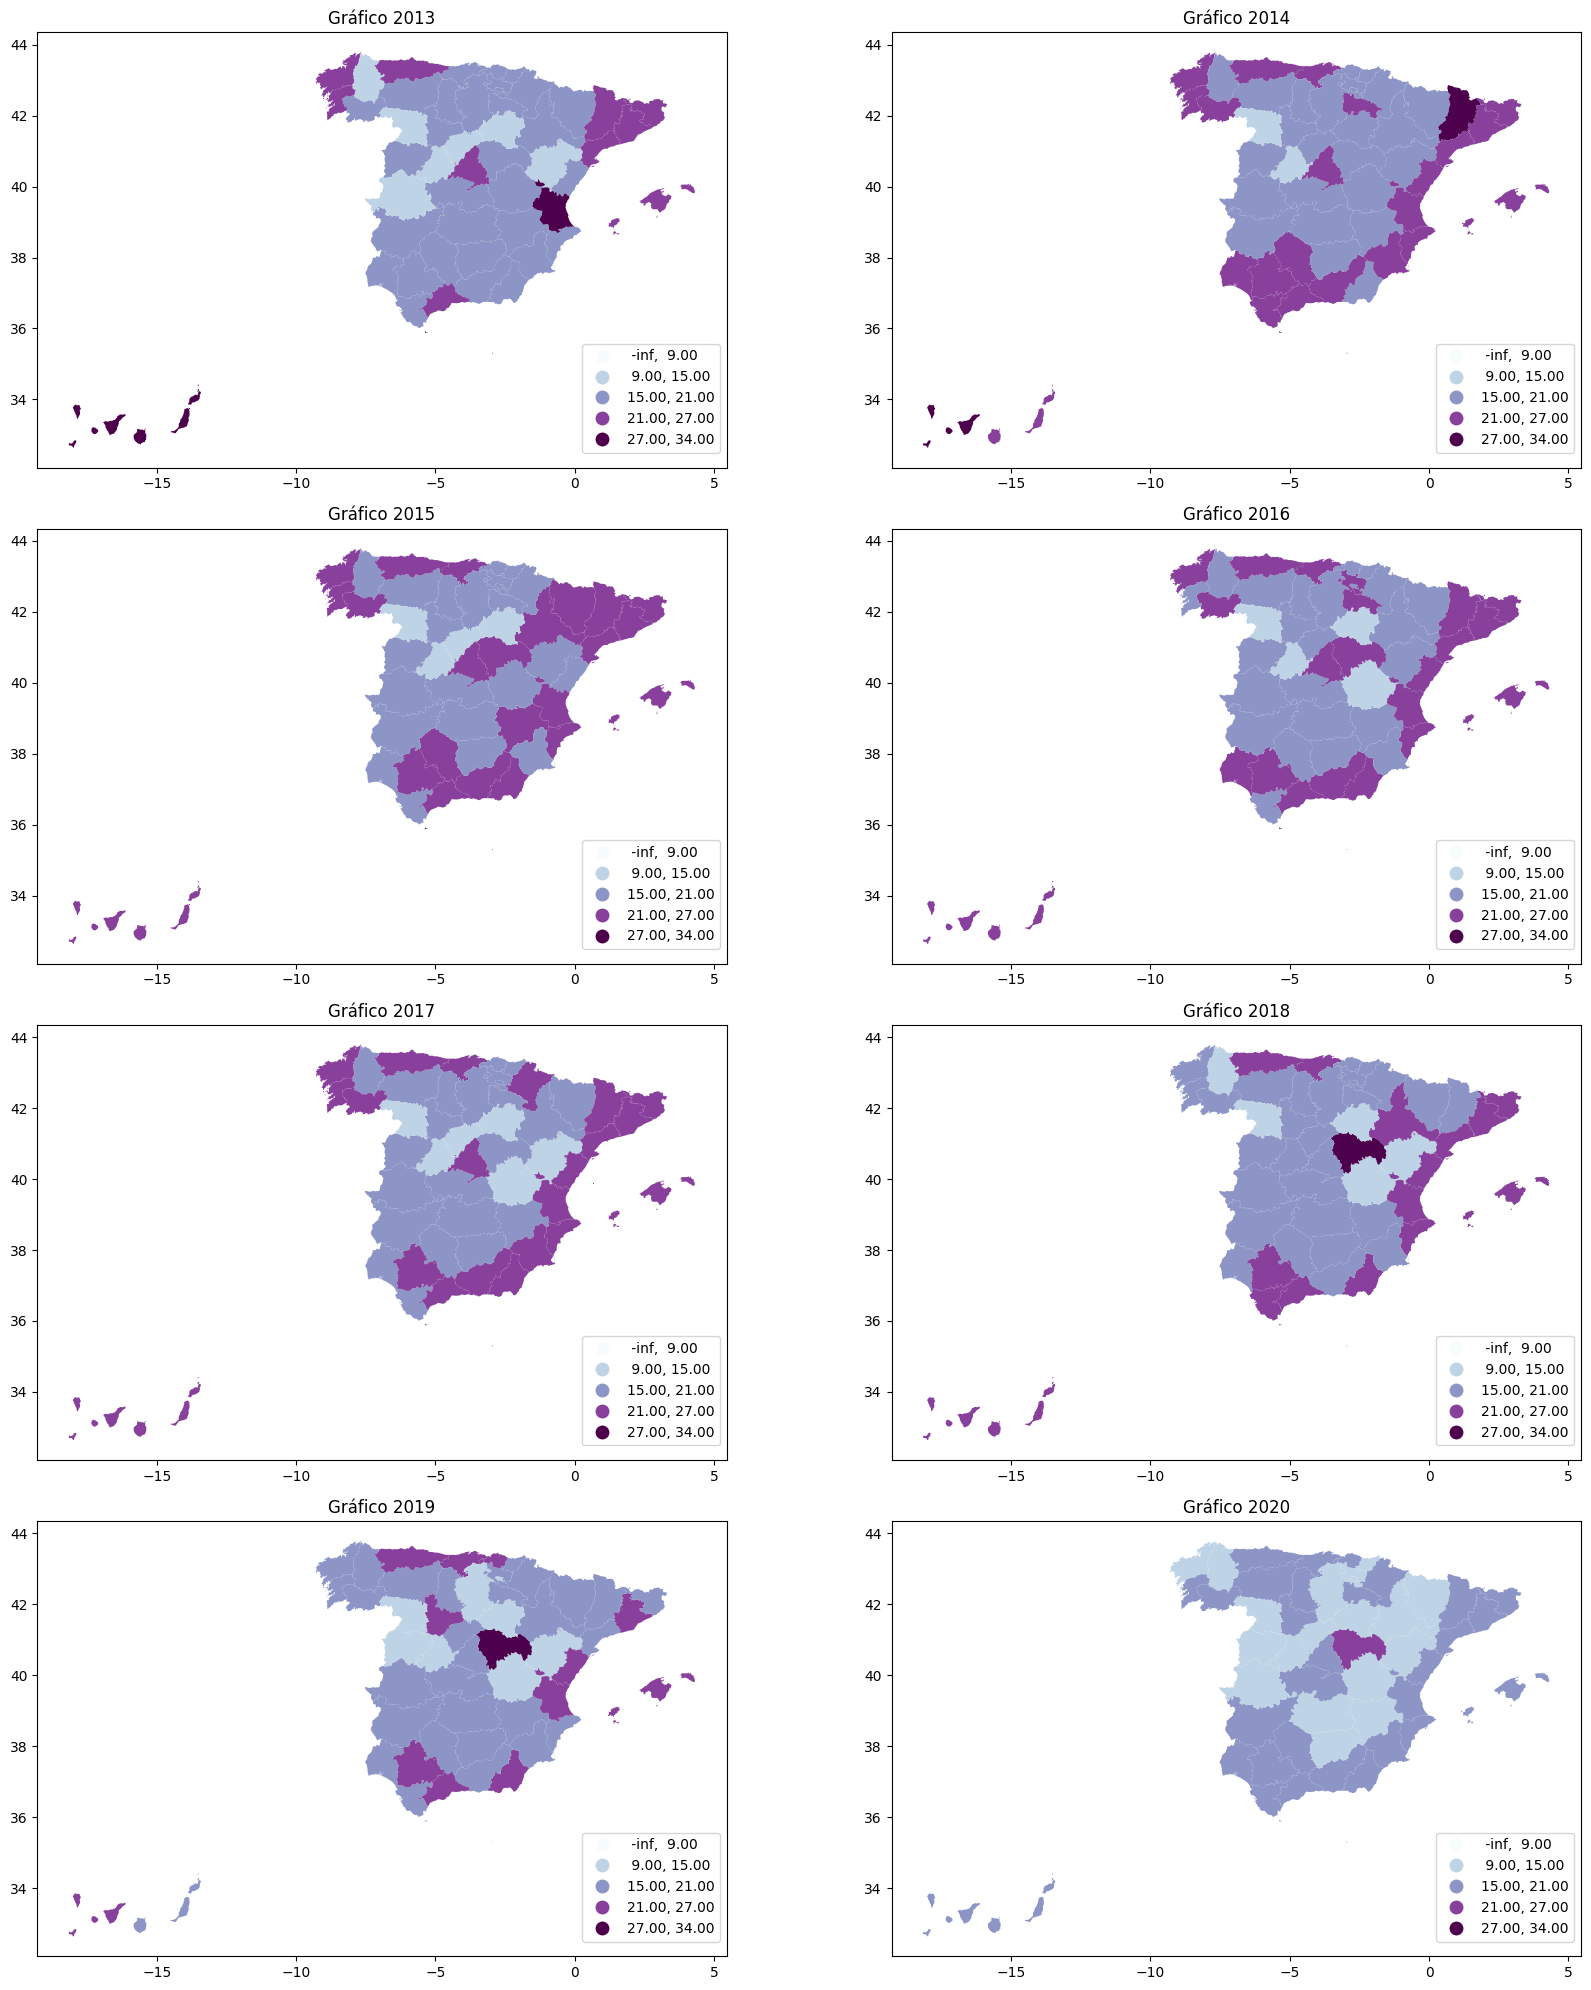

In [202]:

# Crear una figura con subplots en una cuadrícula 2x4
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))

# Años a mostrar en los gráficos
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Definir los límites de cada rango
class_limits = [9, 15, 21, 27, 34]

# Iterar sobre los subplots y los años
for i, ax in enumerate(axes.flat):
    # Obtener el año correspondiente
    year = years[i]
    
    # Filtrar los datos correspondientes al año actual
    filtered_data = merged[merged[year].notnull()]
    
    # Generar el gráfico correspondiente
    filtered_data.plot(column=year, scheme='UserDefined', classification_kwds={'bins': class_limits},
                       legend=True, ax=ax, cmap='BuPu')
    

      # Ajustar el tamaño de la leyenda completa
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1.0, 0.3))

    # Establecer el título del gráfico
    ax.set_title('Gráfico {}'.format(year[:-1]))
    


# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar la figura con los gráficos juntos
plt.show()


GRÁFICOS DE SEPARACIONES


<ipython-input-203-699d84f46e39>:16: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



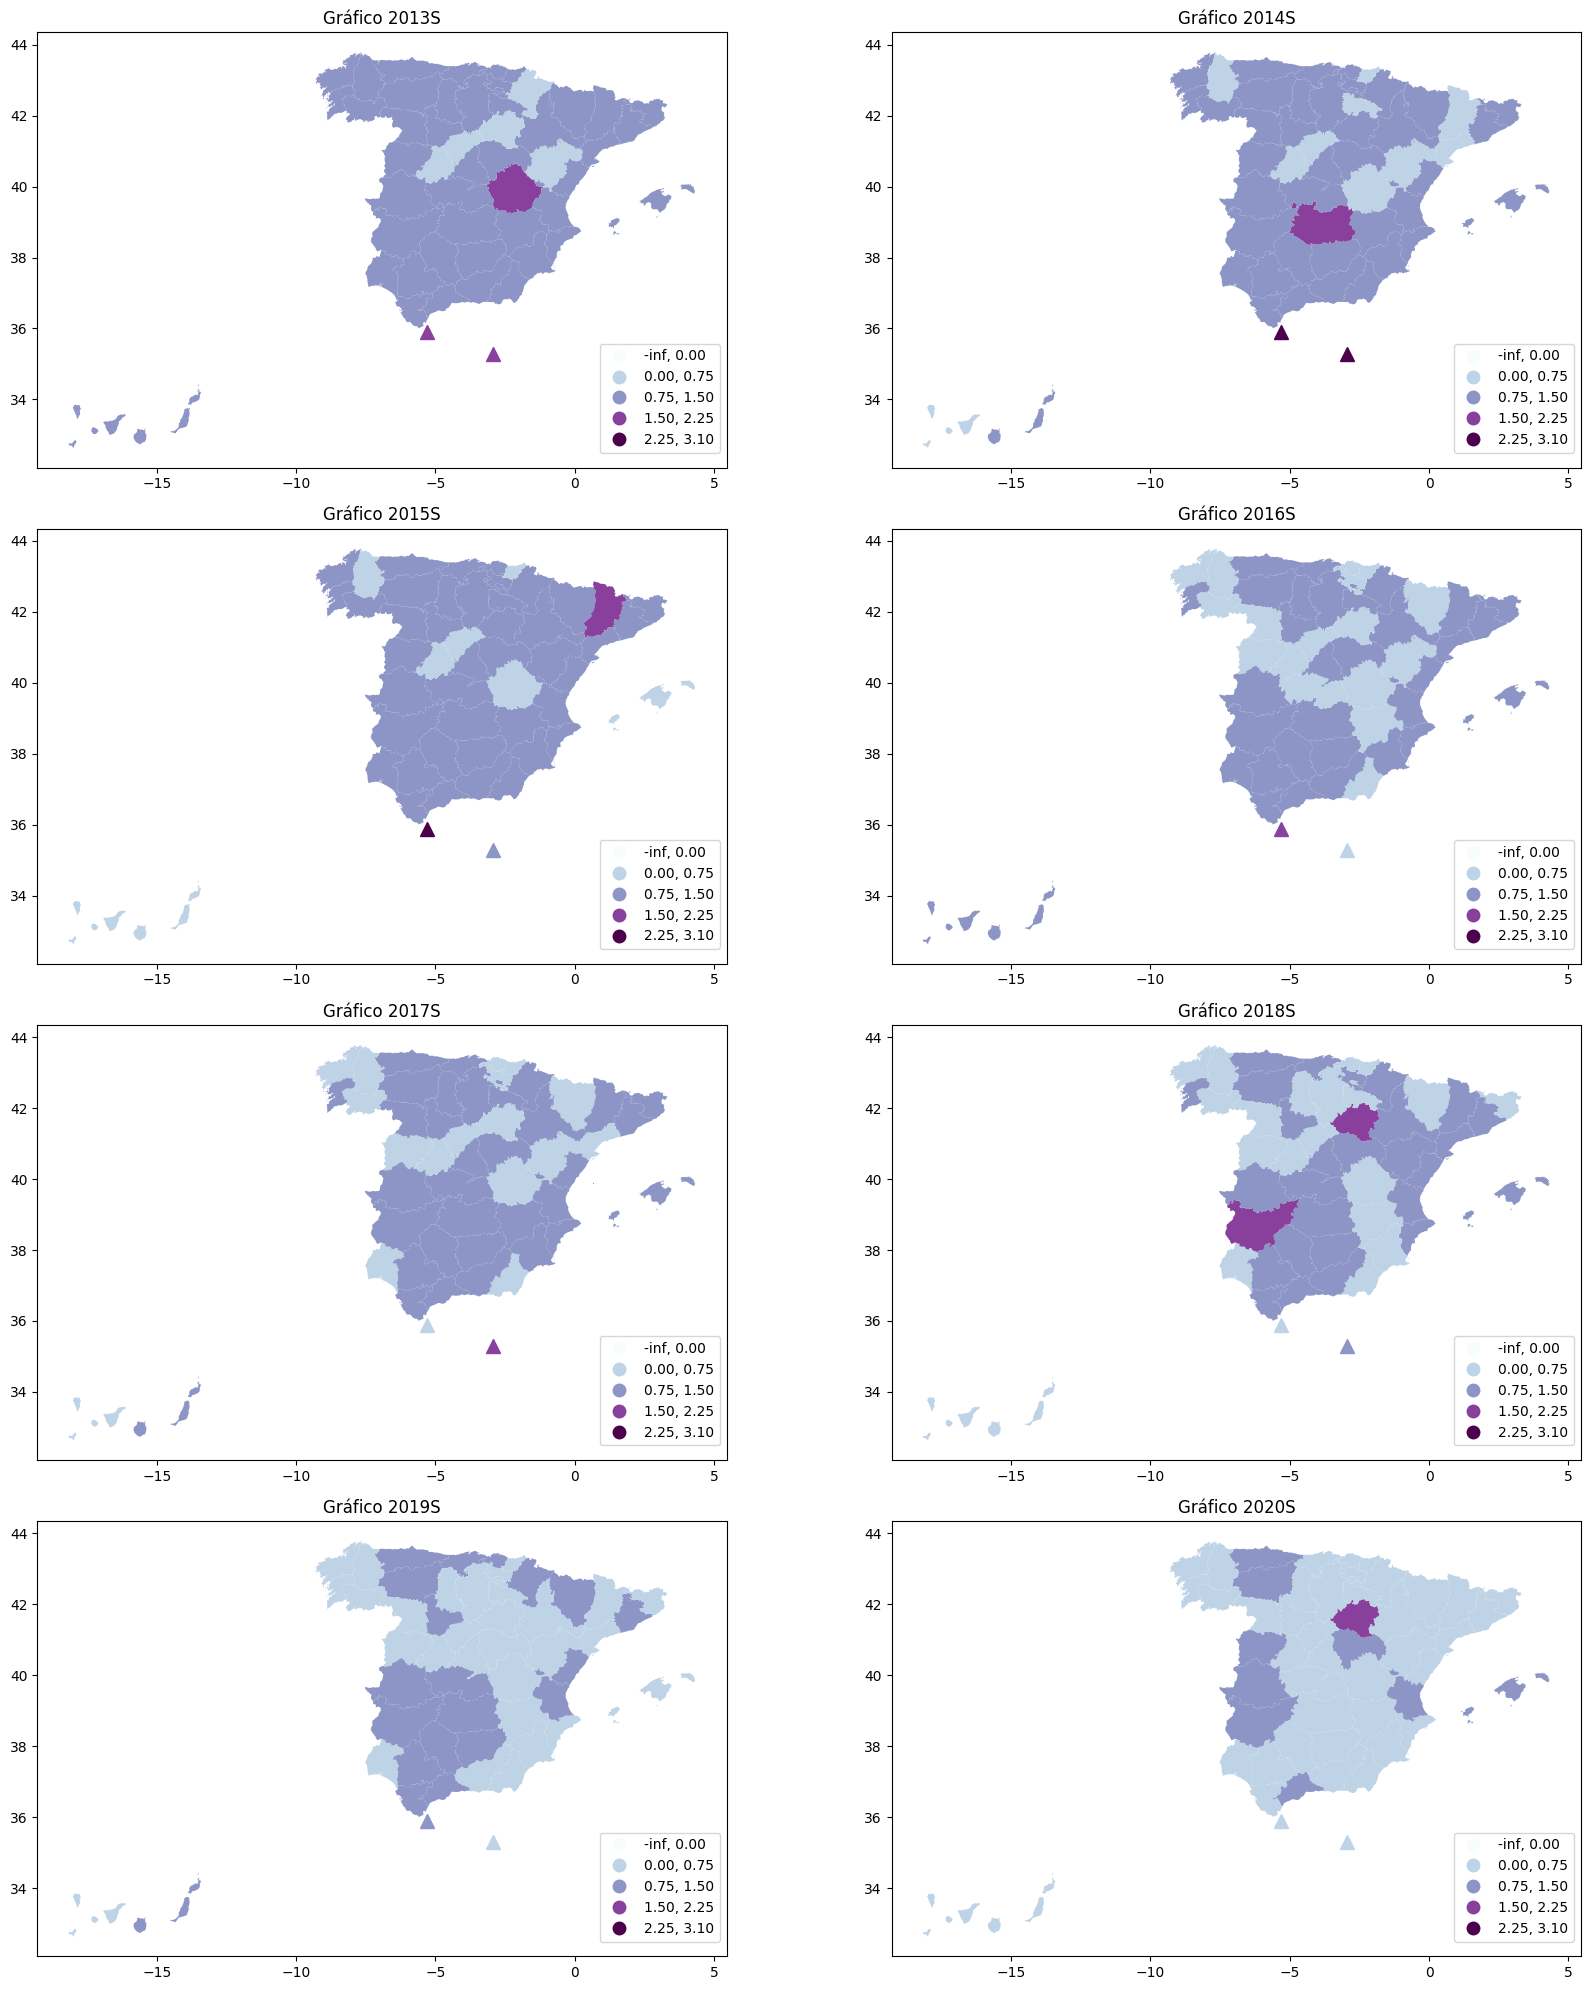

In [203]:
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Crear una figura con subplots en una cuadrícula 2x4
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))


# Años a mostrar en los gráficos
years = ['2013SM', '2014SM', '2015SM', '2016SM', '2017SM', '2018SM', '2019SM', '2020SM']

# Definir los límites de cada rango
class_limits = [0,0.75,1.5,2.25,3.1]

# Obtener los colores de la paleta 'BuPu' para los rangos
color_palette = plt.cm.get_cmap('BuPu', len(class_limits))

# Iterar sobre los subplots y los años
for i, ax in enumerate(axes.flat):
    # Obtener el año correspondiente
    year = years[i]
    
    # Filtrar los datos correspondientes al año actual
    filtered_data = merged[merged[year].notnull()]
    
    # Generar el gráfico correspondiente
    filtered_data.plot(column=year, scheme='UserDefined', classification_kwds={'bins': class_limits},
                       legend=True, ax=ax, cmap='BuPu')

    # Obtener los valores de los datos para los marcadores
    ceuta_value = filtered_data.loc[filtered_data['NAME_2'] == 'Ceuta', year].values[0]
    melilla_value = filtered_data.loc[filtered_data['NAME_2'] == 'Melilla', year].values[0]

    # Obtener el índice del rango en el que se encuentra el valor
    ceuta_range_index = np.searchsorted(class_limits, ceuta_value)
    melilla_range_index = np.searchsorted(class_limits, melilla_value)

    # Asignar colores de la paleta 'BuPu' basados en los índices de rango
    ceuta_color = color_palette(ceuta_range_index)
    melilla_color = color_palette(melilla_range_index)

    # Agregar los marcadores con los colores correspondientes
    ax.plot(-5.3198, 35.8894, marker='^', markersize=10, color=ceuta_color, label='Ceuta')
    ax.plot(-2.9381, 35.2923, marker='^', markersize=10, color=melilla_color, label='Melilla')

    # Ajustar el tamaño de la leyenda completa
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1.0, 0.3))

    # Establecer el título del gráfico
    ax.set_title('Gráfico {}'.format(year[:-1]))

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar la figura con los gráficos juntos
plt.show()




GRÁFICOS DE DIVORCIOS

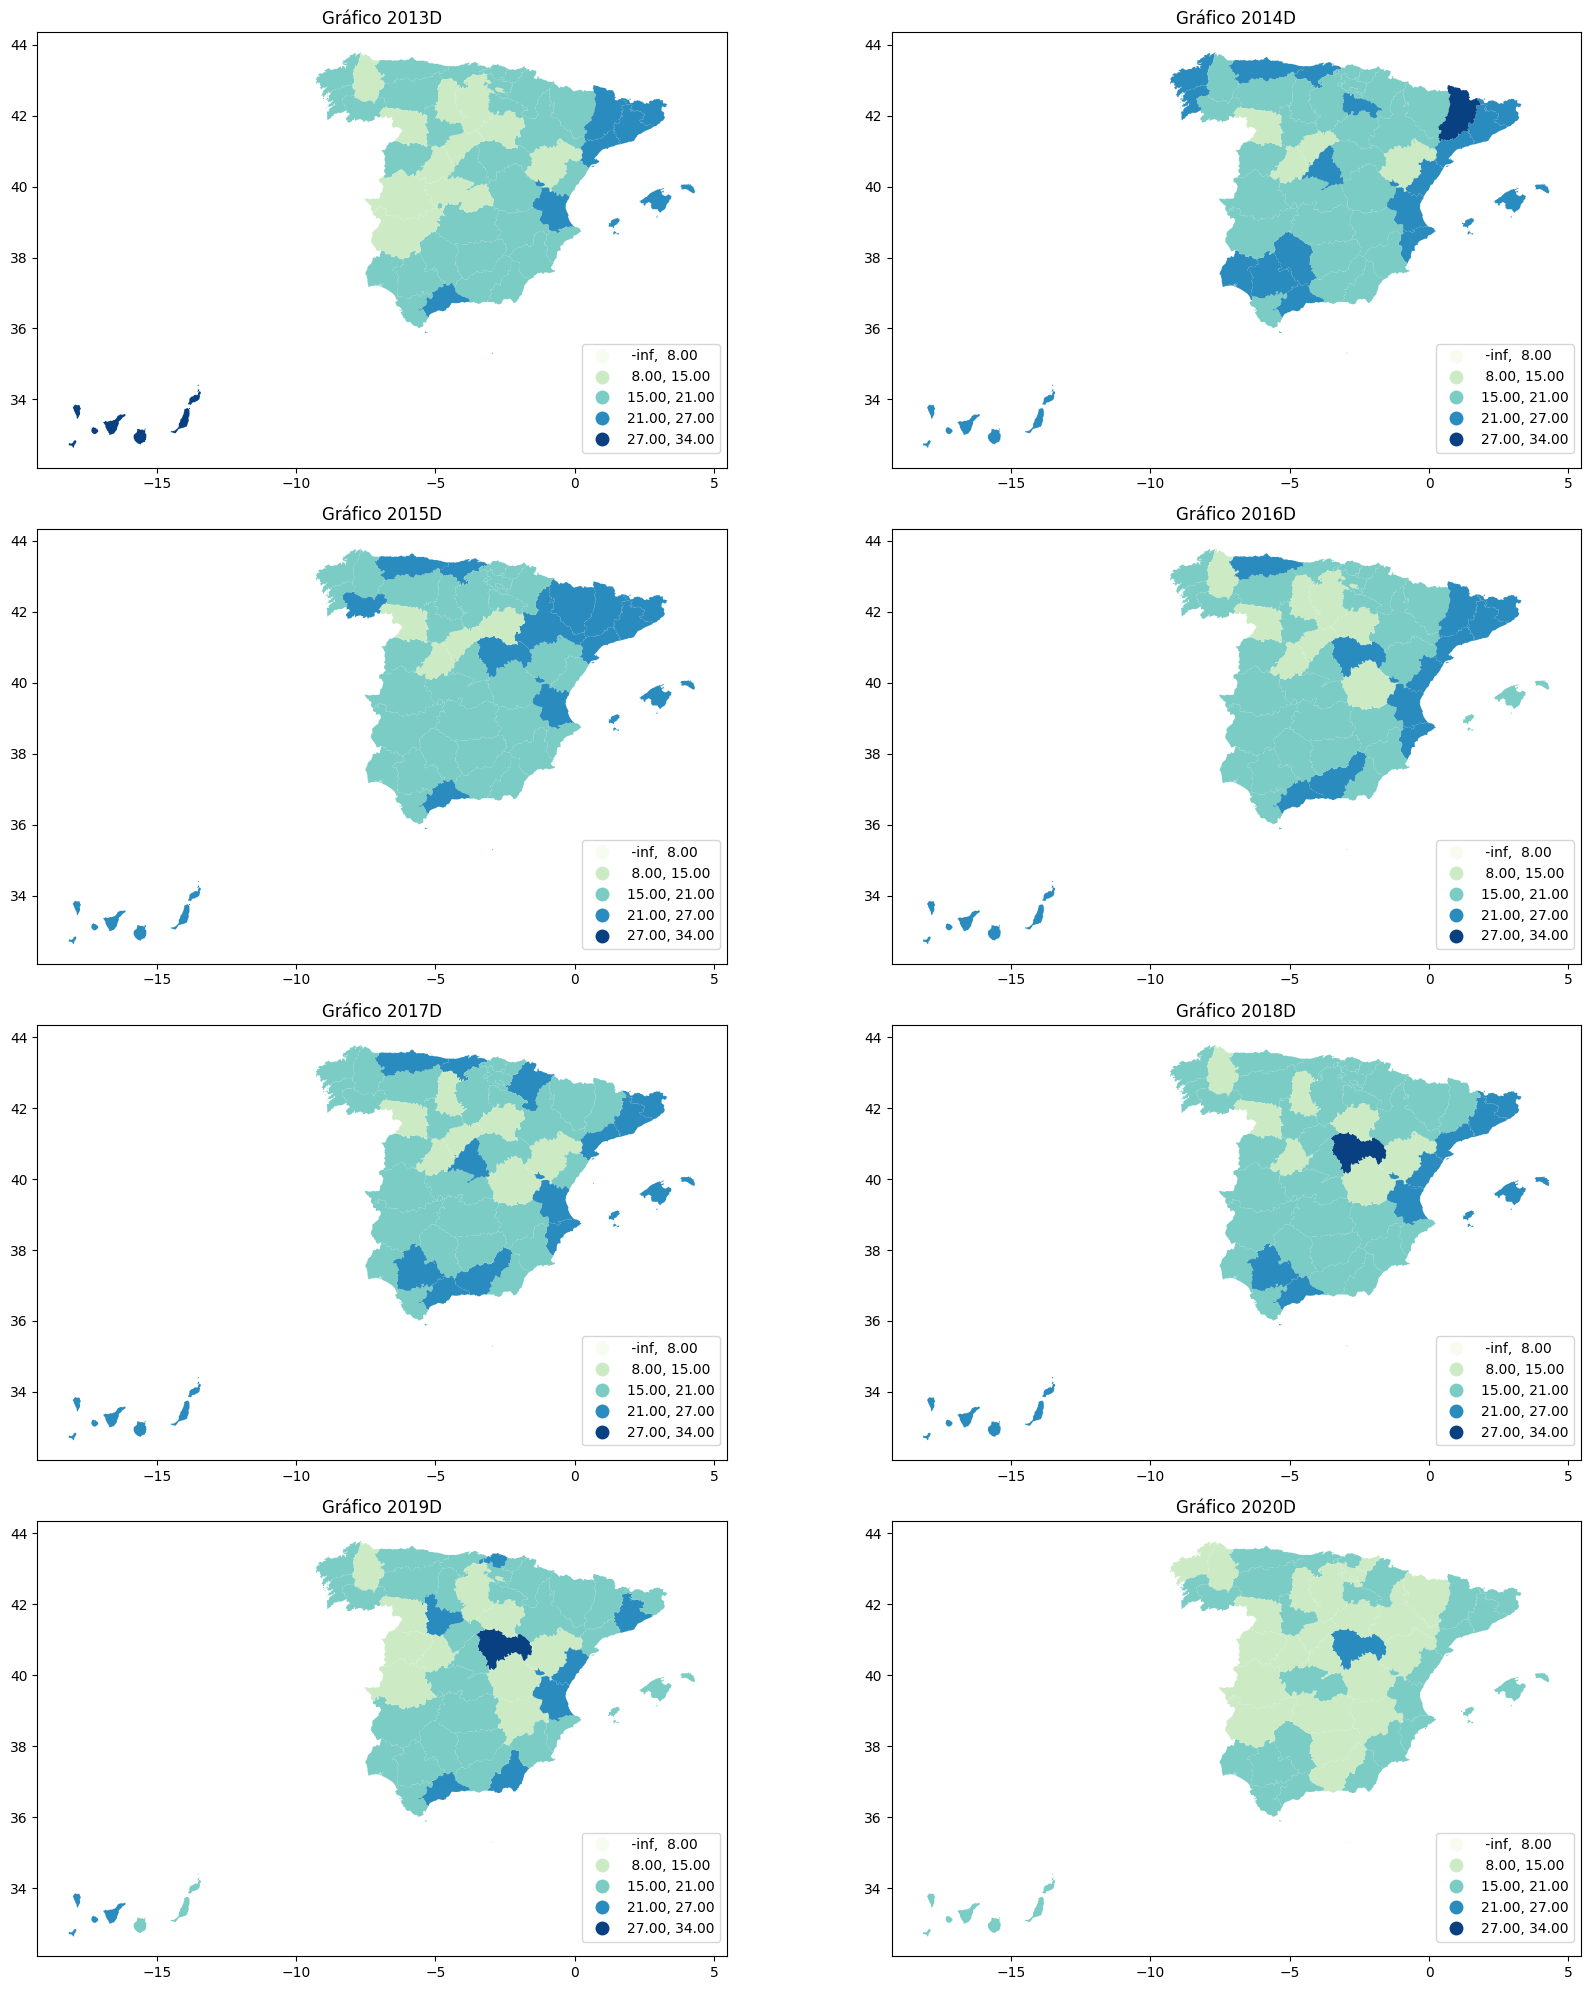

In [206]:
# Crear una figura con subplots en una cuadrícula 4x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))


# Años a mostrar en los gráficos
years = ['2013DM', '2014DM', '2015DM', '2016DM', '2017DM', '2018DM', '2019DM', '2020DM']

# Definir los límites de cada rango
class_limits = [8,15,21,27,34]


# Iterar sobre los subplots y los años
for i, ax in enumerate(axes.flat):
    # Obtener el año correspondiente
    year = years[i]
    
    # Filtrar los datos correspondientes al año actual
    filtered_data = merged[merged[year].notnull()]
    
    # Generar el gráfico correspondiente
    filtered_data.plot(column=year, scheme='UserDefined', classification_kwds={'bins': class_limits},
                       legend=True, ax=ax, cmap='GnBu')
    

      # Ajustar el tamaño de la leyenda completa
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1.0, 0.3))
    
    # Establecer el título del gráfico
    ax.set_title('Gráfico {}'.format(year[:-1]))
    
   


# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar la figura con los gráficos juntos
plt.show()

GRÁFICOS DE NULIDADES

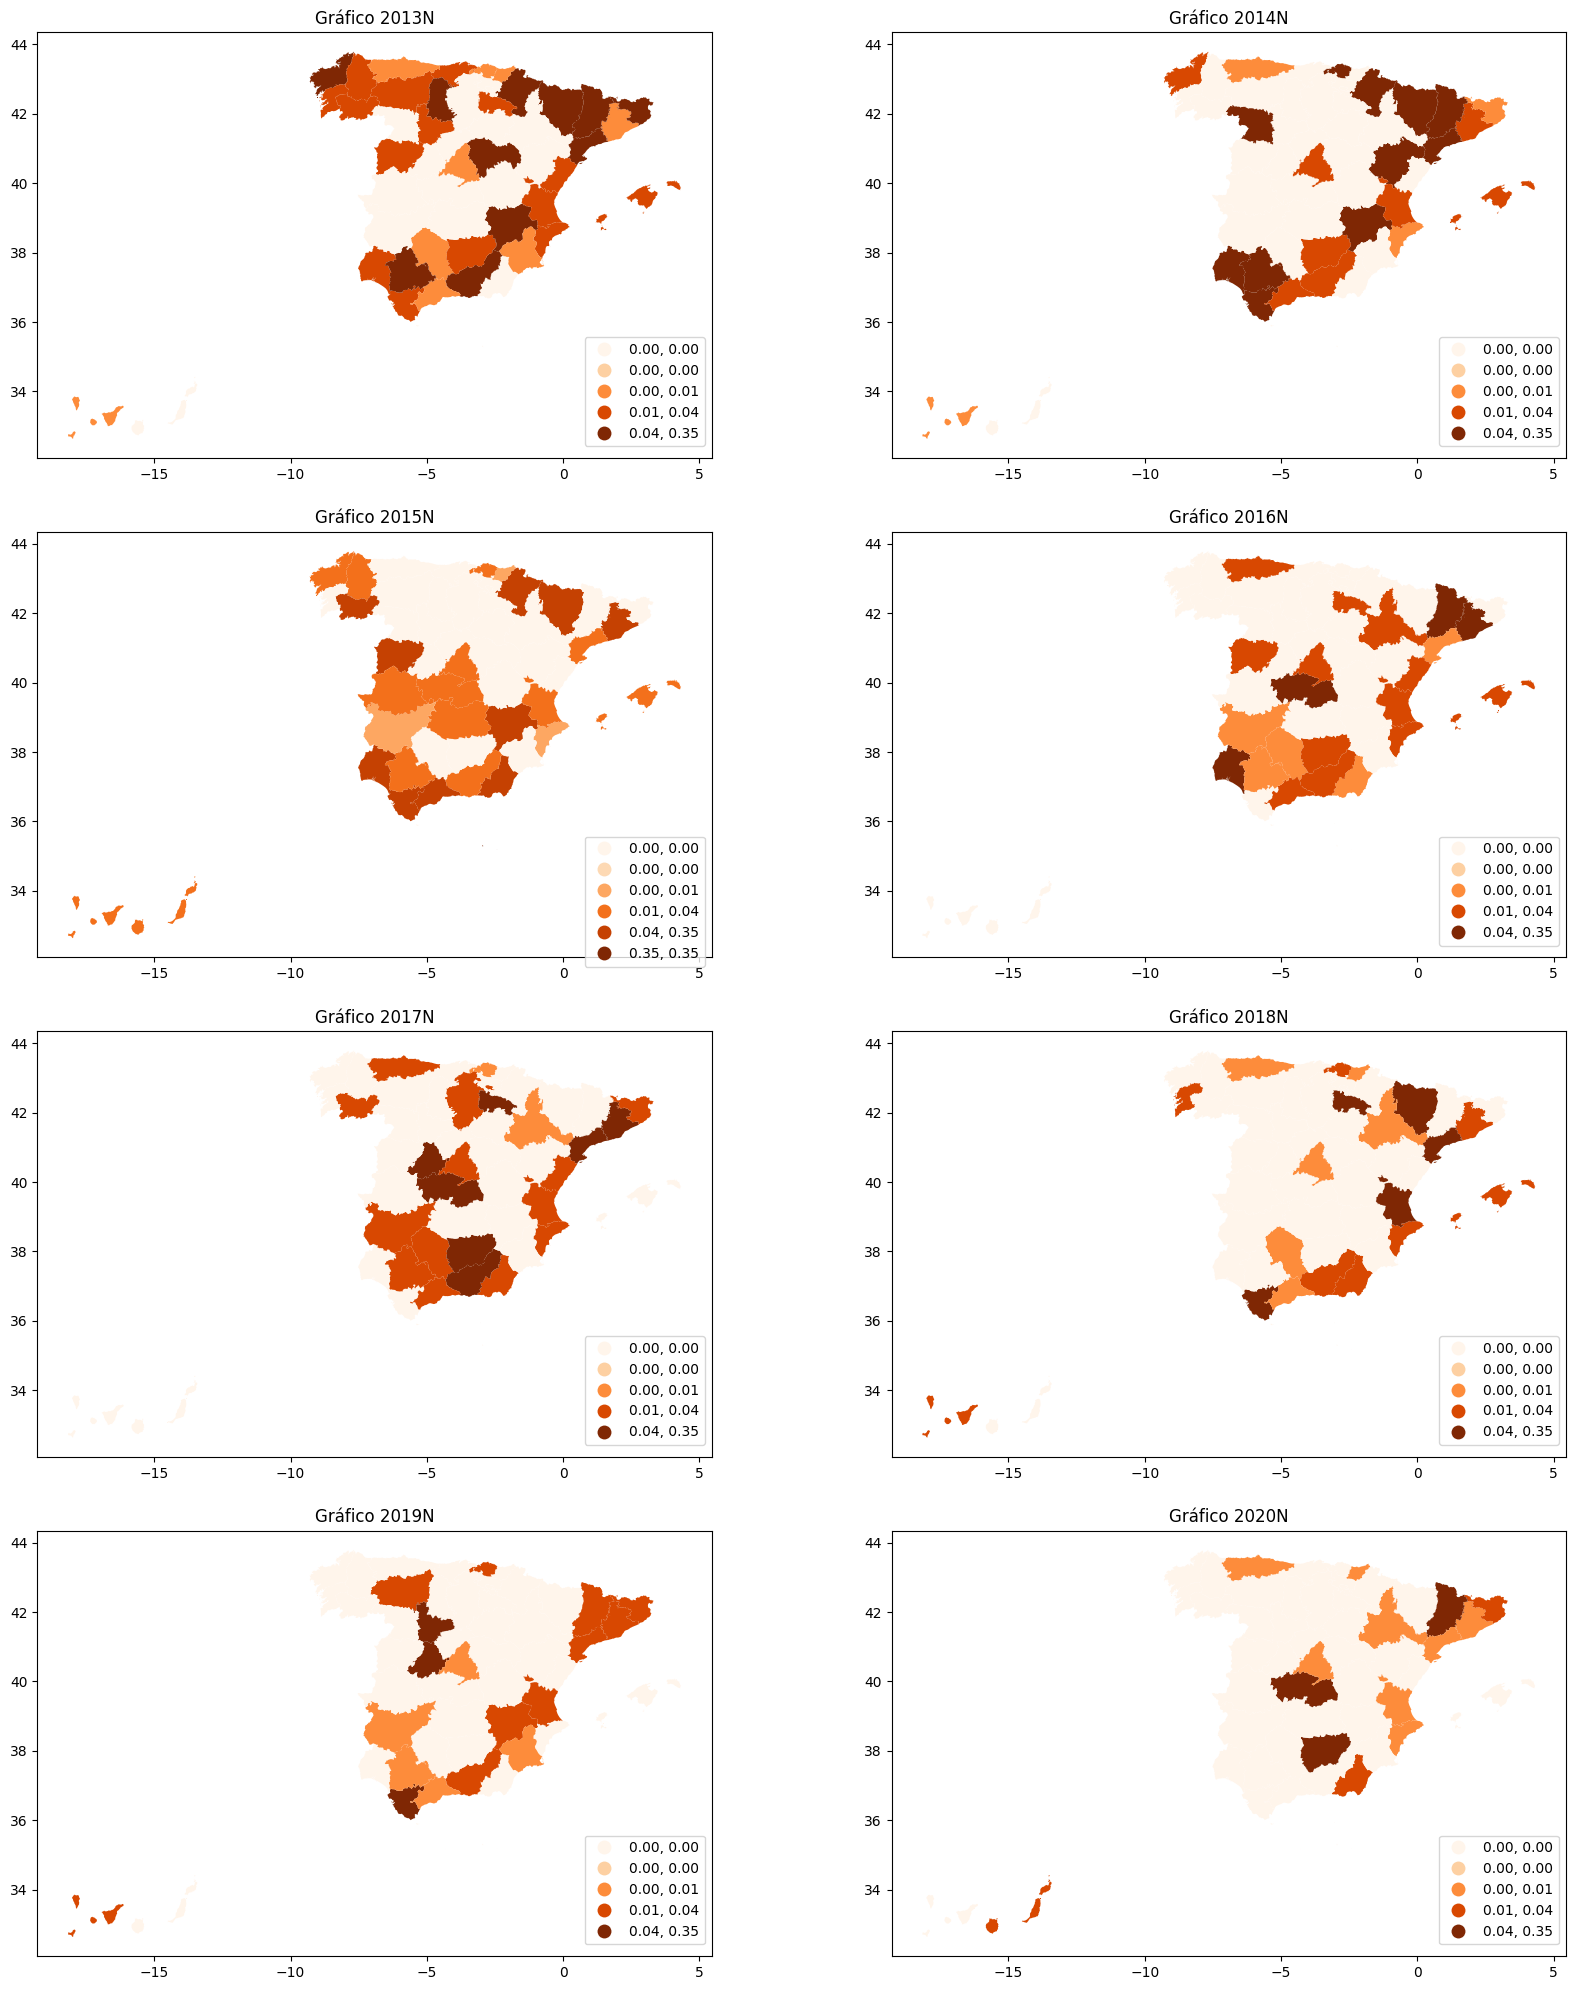

In [207]:
# Crear una figura con subplots en una cuadrícula 2x4
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 20))

# Años a mostrar en los gráficos
years = ['2013NM', '2014NM', '2015NM', '2016NM', '2017NM', '2018NM', '2019NM', '2020NM']

# Definir los límites de cada rango
class_limits = [0, 0.0001, 0.015, 0.04, 0.35]

# Iterar sobre los subplots y los años
for i, ax in enumerate(axes.flat):
    # Obtener el año correspondiente
    year = years[i]
    
    # Filtrar los datos correspondientes al año actual
    filtered_data = merged[merged[year].notnull()]
    
    # Generar el gráfico correspondiente
    filtered_data.plot(column=year, scheme='UserDefined', classification_kwds={'bins': class_limits},
                       legend=True, ax=ax, cmap='Oranges')
    

      # Ajustar el tamaño de la leyenda completa
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1.0, 0.3))

    # Establecer el título del gráfico
    ax.set_title('Gráfico {}'.format(year[:-1]))
    
   


# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar la figura con los gráficos juntos
plt.show()


ESTADISTICA DE AGRUPACIÓN ESPACIAL PARA LA TASA TOTAL DE LA SUMA DE LAS 3

En resumen, estos dos pasos crean una matriz de pesos espaciales Queen y la transforman aplicando una estandarización por fila. Esta matriz de pesos espaciales se utilizará posteriormente en cálculos de indicadores espaciales y análisis de autocorrelación espacial.

In [ ]:
island_ids = [30, 31, 43, 44, 45]
merged = merged[~merged.index.isin(island_ids)]
merged


In [226]:
wq =  lp.weights.Queen.from_dataframe(merged)
wq.transform = 'r'

este código itera sobre los años especificados, calcula el lag espacial que representa la media ponderada de los valores vecinos para cada unidad geográfica  para cada año y muestra los resultados. 

In [227]:

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Calcular ylag para el año actual
    ylag = lp.weights.lag_spatial(wq, y)
    
    # Realizar operaciones con ylag
    # ...
    
    # Mostrar los resultados
    print(f'ylag para {year}: {ylag}')


ylag para 2013M: [20.63448237 21.58702552 19.57647744 19.72077399 18.79650345 18.90283364
 20.38056057 19.72066031 19.17717015 20.59825105 18.24100079 17.84536645
 20.54280495 17.2604107  18.52510382 15.7983651  16.29458184 16.56549228
 16.98179161 17.50956181 18.38091836 14.34432273 16.40199452 16.29441924
 15.17381095 18.91595542 23.70056999 24.14479168 21.72685351 19.60215476
 15.03101212 18.10308883 21.72573454 21.7070303  17.50549811 17.91083462
 15.37442113 17.24658697 20.77931479 16.76468135 18.11851529 16.25068405
 17.25599078 17.56282247 17.62891469 17.66669075 19.50159086]
ylag para 2014M: [21.41227204 22.97287376 20.68847066 20.61563093 20.92310288 20.0526368
 22.07681434 21.89847801 24.31282998 21.70304979 22.1222963  19.27790211
 20.83320371 18.50574011 20.01097412 17.72861289 17.80914165 18.39011768
 18.92891544 19.34052753 19.54530417 16.03930683 18.66985833 18.99895996
 16.25614094 19.4755791  26.88851126 29.91300615 22.69427959 23.34907848
 16.34498939 20.10436194 21.7

este código itera sobre los años especificados, calcula el lag espacial y lo clasifica en cuantiles utilizando la biblioteca mapclassify. Luego, muestra los resultados de la clasificación del lag espacial para cada año.

In [228]:
import mapclassify as mc

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Calcular ylag para el año actual
    ylag = lp.weights.lag_spatial(wq, y)
    
    # Calcular ylagq5 para el año actual
    ylagq5 = mc.Quantiles(ylag, k=4)
    
    # Mostrar los resultados
    print(f'ylagq5 para {year}:')
    print(ylagq5)
    print()


ylagq5 para 2013M:
Quantiles

   Interval      Count
----------------------
[14.34, 17.11] |    12
(17.11, 18.12] |    12
(18.12, 19.72] |    11
(19.72, 24.14] |    12

ylagq5 para 2014M:
Quantiles

   Interval      Count
----------------------
[16.04, 18.85] |    12
(18.85, 20.01] |    12
(20.01, 21.75] |    11
(21.75, 29.91] |    12

ylagq5 para 2015M:
Quantiles

   Interval      Count
----------------------
[15.03, 18.45] |    12
(18.45, 20.01] |    12
(20.01, 21.21] |    11
(21.21, 24.86] |    12

ylagq5 para 2016M:
Quantiles

   Interval      Count
----------------------
[15.73, 18.14] |    12
(18.14, 19.40] |    12
(19.40, 20.69] |    11
(20.69, 23.84] |    12

ylagq5 para 2017M:
Quantiles

   Interval      Count
----------------------
[15.36, 17.98] |    12
(17.98, 19.17] |    12
(19.17, 20.84] |    11
(20.84, 23.27] |    12

ylagq5 para 2018M:
Quantiles

   Interval      Count
----------------------
[15.99, 17.80] |    12
(17.80, 19.01] |    12
(19.01, 20.30] |    11
(20.30, 23

Se crea un mapa para cada año teniendo en cuenta que se grafica la nueva columna obtenida ylagq5 que contiene los valores de clasificación cuantil para cada ubicación espacial.

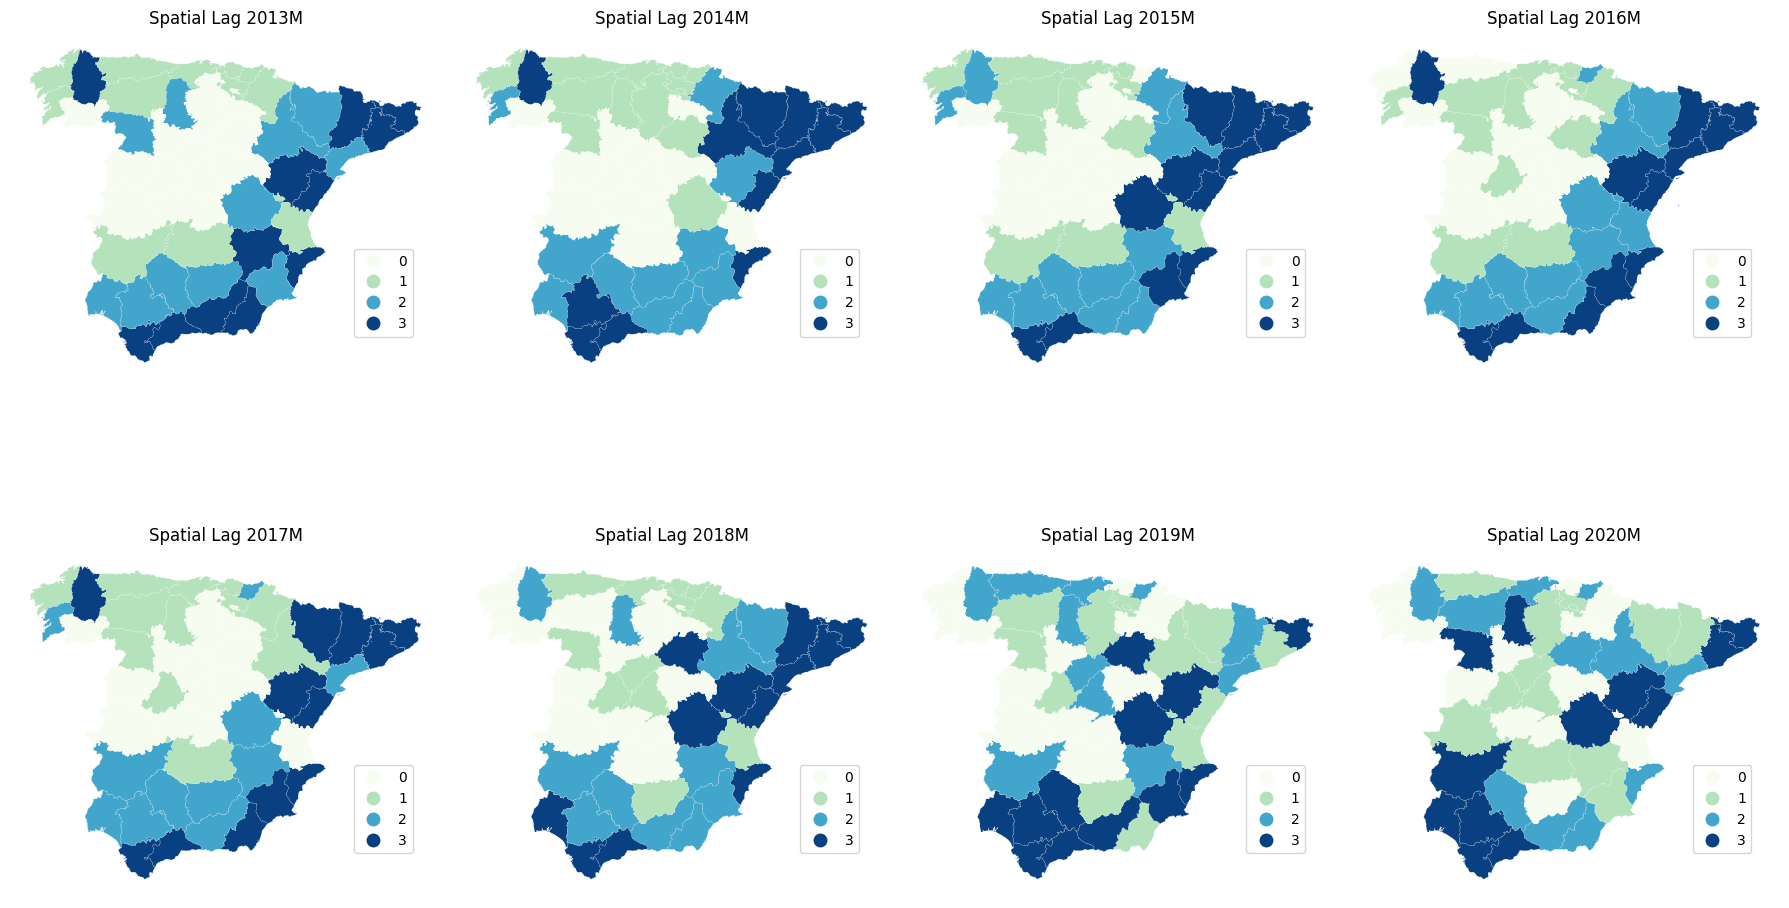

In [255]:


# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Configuración del gráfico
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
axes = axes.flatten()

# Iterar sobre los años
for i, year in enumerate(years):
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Calcular ylag para el año actual
    ylag = lp.weights.lag_spatial(wq, y)
    
    # Dividir ylag en quintiles
    ylagq5 = mc.Quantiles(ylag, k=4)
    
    # Crear un nuevo DataFrame con los datos y el valor de ylagq5
    data_with_ylagq5 = merged.assign(ylagq5=ylagq5.yb)
    
    # Configurar el subplot correspondiente al año actual
    ax = axes[i]
    
    # Generar el gráfico
    data_with_ylagq5.plot(column='ylagq5', categorical=True, k=5, cmap='GnBu', linewidth=0.1,
                          edgecolor='white', legend=True, ax=ax)
    
    # Configurar el título del gráfico
    ax.set_title(f"Spatial Lag {year}")
    
    # Ocultar los ejes
    ax.set_axis_off()
    
    # Ajustar la posición de la leyenda
    ax.get_legend().set_bbox_to_anchor((0.95, 0.4))

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()



Medianas de cada año 

In [231]:
# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Lista para almacenar las medianas
median_values = []

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Calcular la mediana
    median = y.median()
    
    # Agregar la mediana a la lista
    median_values.append(median)

# Imprimir las medianas de cada año
for i, year in enumerate(years):
    print("{}: {}".format(year, median_values[i]))


2013M: 18.82983031995599
2014M: 20.505197933362584
2015M: 19.809908435748355
2016M: 19.564609471890687
2017M: 19.6211340592389
2018M: 19.782384953755923
2019M: 18.29382748720663
2020M: 16.112023052878108


Numero de observaciones que estan encima y debajo de la mediana 


In [232]:

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    column = merged[year]
    
    # Calcular la mediana
    median = column.median()
    
    # Obtener los valores mayores que la mediana
    yb = column > median
    
    # Calcular la cantidad de valores mayores que la mediana
    count = sum(yb)
    
    # Imprimir el resultado
    print("{}: {}".format(year, count))


2013M: 23
2014M: 23
2015M: 23
2016M: 23
2017M: 23
2018M: 23
2019M: 23
2020M: 23


In [233]:
# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Etiquetas para los valores
labels = ["0 Low", "1 High"]

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    column = merged[year]
    
    # Calcular la mediana
    median = column.median()
    
    # Obtener los valores mayores que la mediana
    yb = column > median
    
    # Asignar etiquetas a los valores
    yb_labels = [labels[i] for i in 1 * yb]
    
    # Asignar las etiquetas a la columna 'yb'
    merged['yb'] = yb_labels


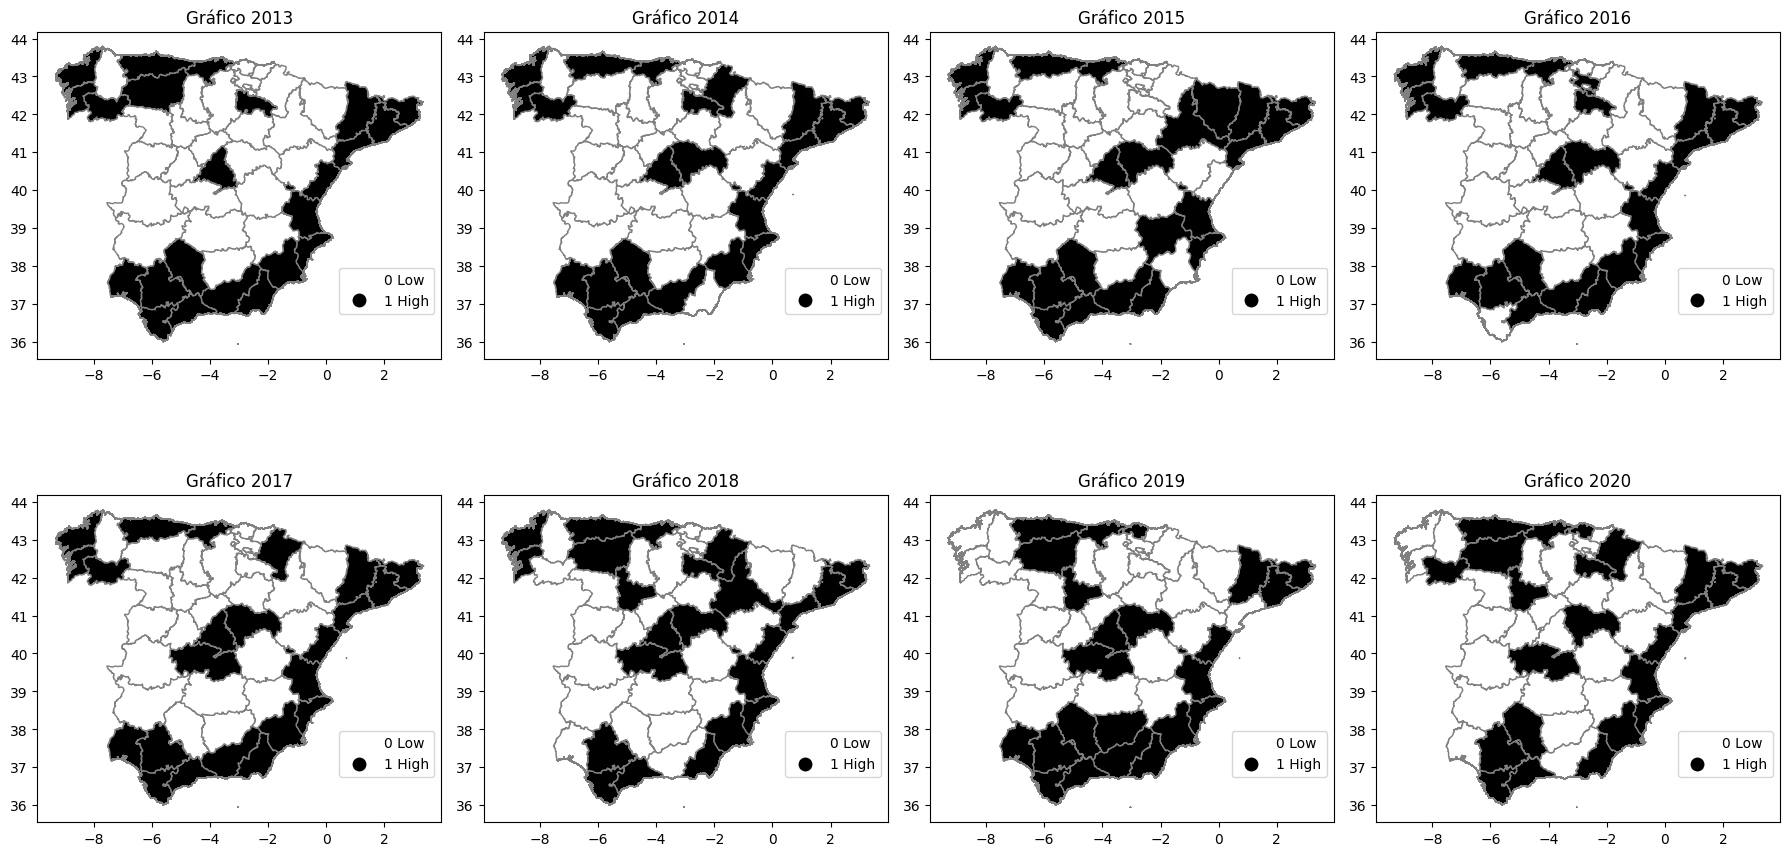

In [234]:
# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Crear una figura con subplots en una cuadrícula 2x4
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Iterar sobre los subplots y los años
for i, ax in enumerate(axes.flat):
    # Obtener el año correspondiente
    year = years[i]
    
    # Filtrar los datos correspondientes al año actual
    filtered_data = merged[merged[year].notnull()]
    
    # Calcular yb para el año actual
    y = merged[year]
    yb = y > y.median()
    labels = ["0 Low", "1 High"]
    yb = [labels[i] for i in 1*yb]
    filtered_data['yb'] = yb
    
    # Generar el gráfico correspondiente
    filtered_data.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)
    
    # Ajustar el tamaño de la leyenda completa
    legend = ax.get_legend()
    legend.set_bbox_to_anchor((1.0, 0.3))

    # Establecer el título del gráfico
    ax.set_title('Gráfico {}'.format(year[:-1]))

# Ajustar los espacios entre los gráficos
plt.tight_layout()

# Mostrar la figura con los gráficos juntos
plt.show()


El resultado impreso muestra las uniones externas (uniones entre áreas de diferentes categorías), las uniones internas (uniones entre áreas de la misma categoría) y las uniones cruzadas (uniones entre áreas vecinas que tienen categorías diferentes)

In [235]:
import esda
import numpy as np

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Convertir a binario
    yb = 1 * (y > y.median())
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'b'
    
    # Fijar la semilla aleatoria
    np.random.seed(12345)
    
    # Calcular las estadísticas de unión
    jc = esda.join_counts.Join_Counts(yb, wq)
    
    # Mostrar los resultados
    print(f'Año {year}:')
    print(f'Uniones externas: {jc.bb}')
    print(f'Uniones internas: {jc.ww}')
    print(f'Uniones cruzadas: {jc.bw}\n')


Año 2013M:
Uniones externas: 27.0
Uniones internas: 45.0
Uniones cruzadas: 39.0

Año 2014M:
Uniones externas: 24.0
Uniones internas: 40.0
Uniones cruzadas: 47.0

Año 2015M:
Uniones externas: 28.0
Uniones internas: 41.0
Uniones cruzadas: 42.0

Año 2016M:
Uniones externas: 23.0
Uniones internas: 40.0
Uniones cruzadas: 48.0

Año 2017M:
Uniones externas: 23.0
Uniones internas: 42.0
Uniones cruzadas: 46.0

Año 2018M:
Uniones externas: 22.0
Uniones internas: 32.0
Uniones cruzadas: 57.0

Año 2019M:
Uniones externas: 27.0
Uniones internas: 37.0
Uniones cruzadas: 47.0

Año 2020M:
Uniones externas: 22.0
Uniones internas: 31.0
Uniones cruzadas: 58.0



Uniones externas (jc.bb): cantidad de uniones entre áreas de diferentes categorías.
Uniones internas (jc.ww): cantidad de uniones entre áreas de la misma categoría.
Uniones cruzadas (jc.bw): cantidad de uniones entre áreas vecinas que tienen categorías diferentes.
Total de uniones (jc.bb + jc.ww + jc.bw): suma de las uniones externas, internas y cruzadas.
Promedio de uniones externas (jc.mean_bb): promedio de las uniones externas obtenido a través de simulaciones aleatorias.
Simulaciones de uniones externas (jc.sim_bb): resultados de las simulaciones de uniones externas.

In [236]:

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Convertir a binario
    yb = 1 * (y > y.median())
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'b'
    
    # Fijar la semilla aleatoria
    np.random.seed(12345)
    
    # Calcular las estadísticas de unión
    jc = esda.join_counts.Join_Counts(yb, wq)
    
    # Mostrar los resultados
    print(f'Año {year}:')
    print(f'Uniones externas: {jc.bb}')
    print(f'Uniones internas: {jc.ww}')
    print(f'Uniones cruzadas: {jc.bw}')
    print(f'Total de uniones: {jc.bb + jc.ww + jc.bw}')
    print(f'Promedio de uniones externas: {jc.mean_bb}')
    print(f'Simulaciones de uniones externas: {jc.sim_bb}\n')


Año 2013M:
Uniones externas: 27.0
Uniones internas: 45.0
Uniones cruzadas: 39.0
Total de uniones: 111.0
Promedio de uniones externas: 26.07907907907908
Simulaciones de uniones externas: [20.0 28.0 28.0 18.0 31.0 26.0 22.0 27.0 25.0 25.0 33.0 21.0 25.0 22.0
 27.0 28.0 26.0 25.0 26.0 26.0 24.0 29.0 26.0 34.0 29.0 22.0 24.0 27.0
 27.0 29.0 30.0 28.0 23.0 27.0 23.0 22.0 27.0 28.0 30.0 31.0 33.0 29.0
 28.0 31.0 28.0 28.0 23.0 29.0 23.0 25.0 24.0 23.0 29.0 24.0 28.0 29.0
 28.0 27.0 26.0 22.0 22.0 27.0 25.0 25.0 25.0 28.0 15.0 27.0 25.0 24.0
 25.0 22.0 29.0 33.0 24.0 29.0 27.0 21.0 32.0 27.0 27.0 24.0 24.0 25.0
 25.0 27.0 24.0 27.0 24.0 28.0 25.0 24.0 25.0 28.0 31.0 20.0 22.0 28.0
 30.0 27.0 24.0 28.0 21.0 25.0 29.0 27.0 24.0 24.0 27.0 24.0 26.0 20.0
 23.0 26.0 32.0 30.0 32.0 27.0 16.0 29.0 23.0 29.0 25.0 23.0 21.0 24.0
 30.0 37.0 28.0 20.0 31.0 27.0 26.0 25.0 22.0 25.0 28.0 27.0 28.0 24.0
 27.0 27.0 27.0 26.0 27.0 25.0 29.0 24.0 23.0 25.0 33.0 25.0 29.0 24.0
 25.0 26.0 28.0 24.0 27.0 25.0 20

El código muestra gráficos de distribución de las simulaciones de uniones externas (jc.sim_bb) junto con líneas verticales que representan las uniones externas observadas (jc.bb) y el promedio de uniones externas obtenido a través de las simulaciones (jc.mean_bb)

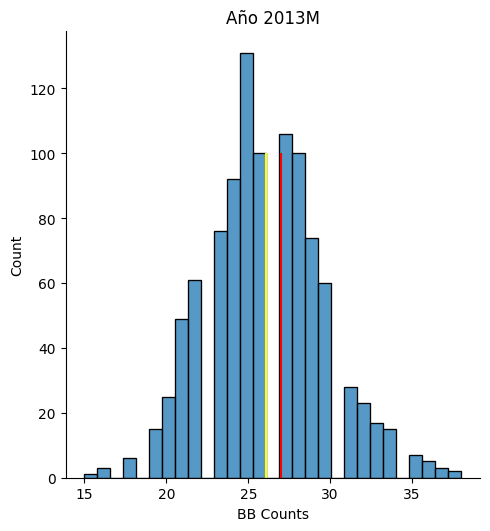

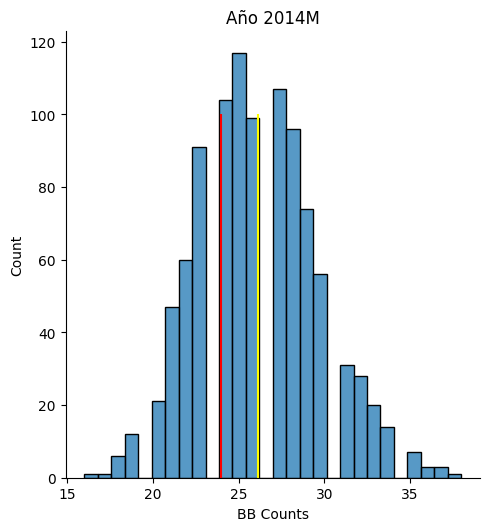

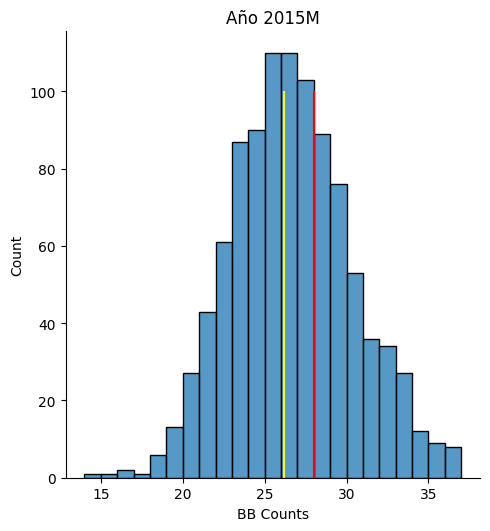

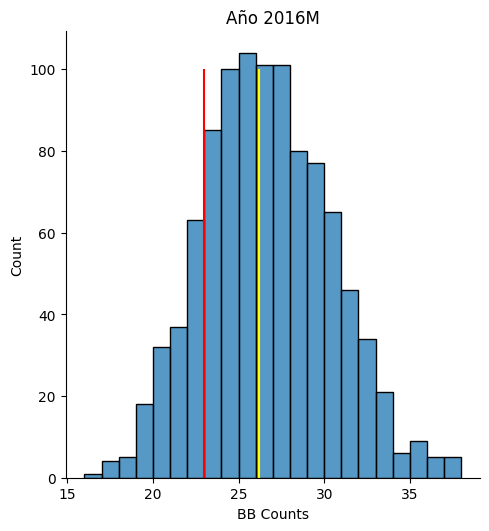

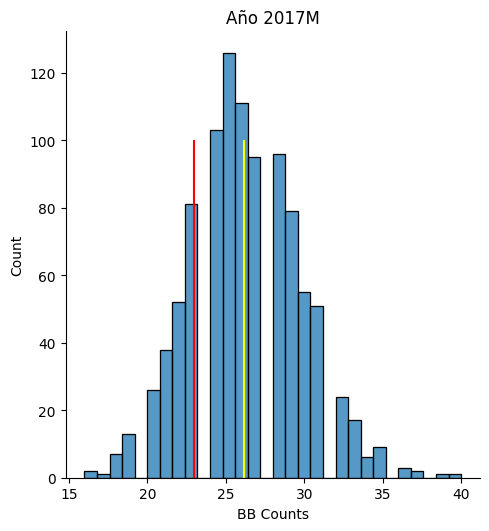

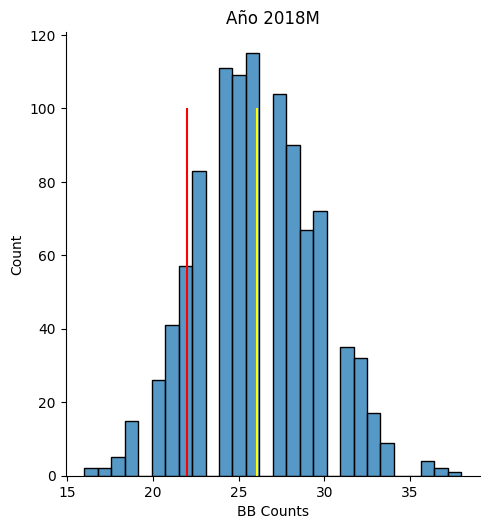

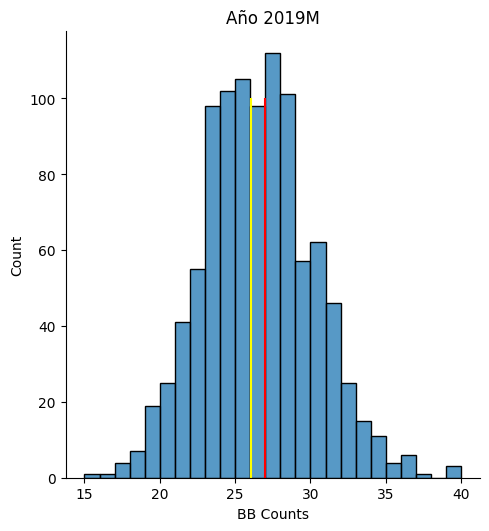

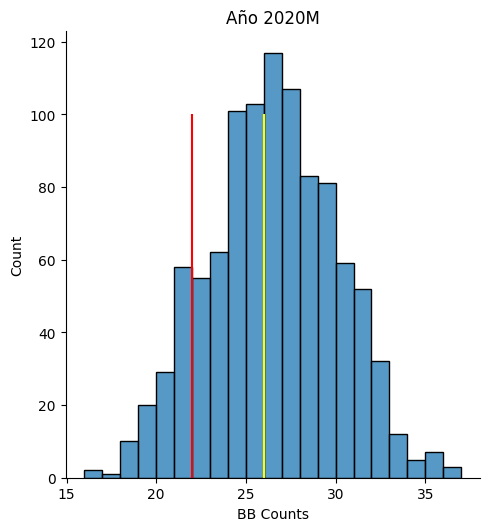

In [239]:


# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Convertir a binario
    yb = 1 * (y > y.median())
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'b'
    
    # Fijar la semilla aleatoria
    np.random.seed(12345)
    
    # Calcular las estadísticas de unión
    jc = esda.join_counts.Join_Counts(yb, wq)
    
    # Generar el gráfico
    sns.displot(jc.sim_bb)
    plt.vlines(jc.bb, 0, 100, color='red')
    plt.vlines(jc.mean_bb, 0, 100,color='yellow')
    plt.xlabel('BB Counts')
    plt.title(f'Año {year}')
    plt.show()


Se calcula el índice de moran de cada año 


In [240]:


# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Fijar la semilla aleatoria
np.random.seed(12345)

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'b'
    
    # Calcular el índice de Moran
    mi = esda.moran.Moran(y, wq)
    
    # Imprimir el valor del índice de Moran
    print("Año {}: I = {}".format(year, mi.I))


Año 2013M: I = 0.2277016194716202
Año 2014M: I = 0.24359213988886644
Año 2015M: I = 0.25742754327291684
Año 2016M: I = 0.20433998178758936
Año 2017M: I = 0.13591592157031934
Año 2018M: I = -0.04164695292659287
Año 2019M: I = -0.09275343993152195
Año 2020M: I = -0.14874053299355683


Se grafica el indice de moran de cada año , tanto el esperado como el observado y el grafico de densidad 

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




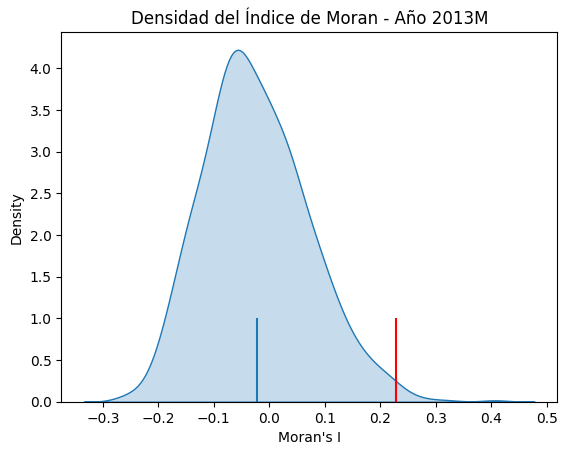

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




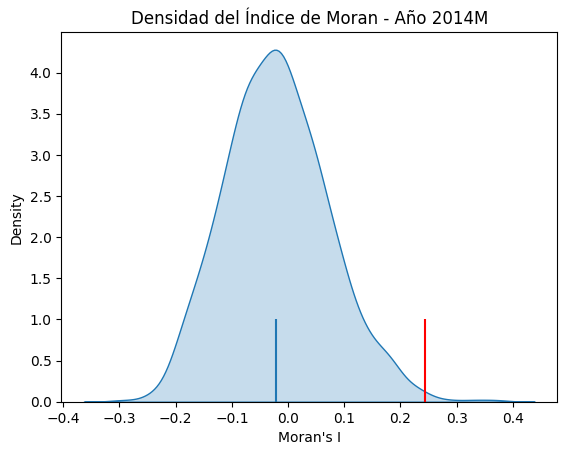

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




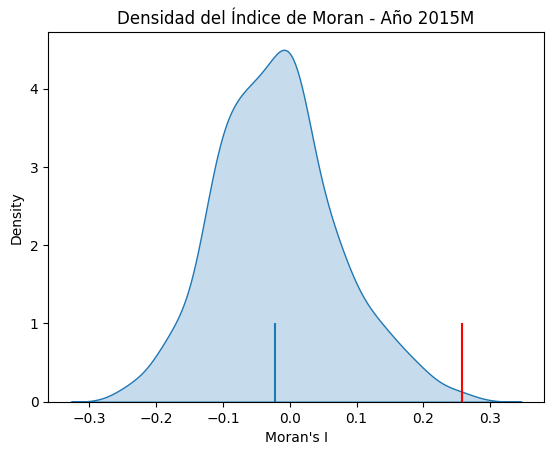

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




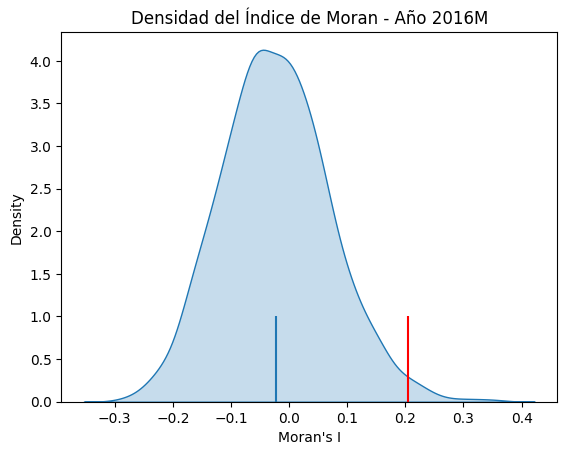

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




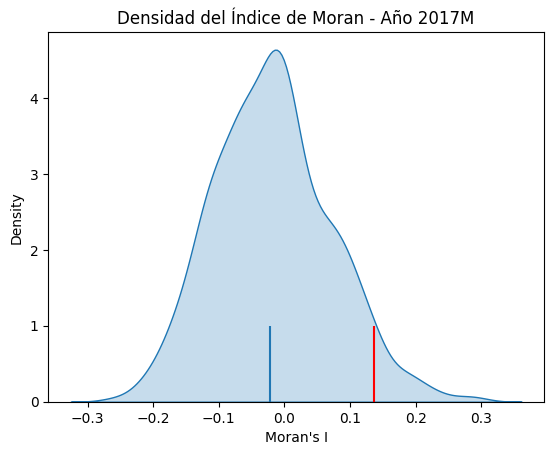

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




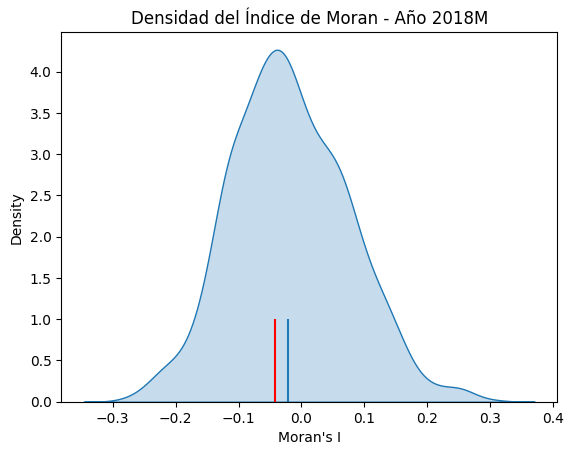

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




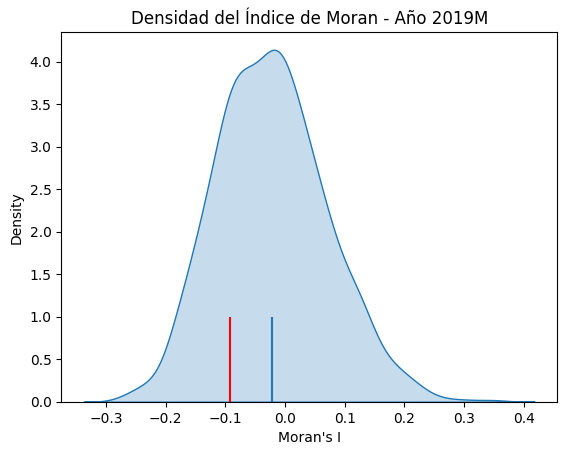

<ipython-input-241-26004b1c1a51>:20: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




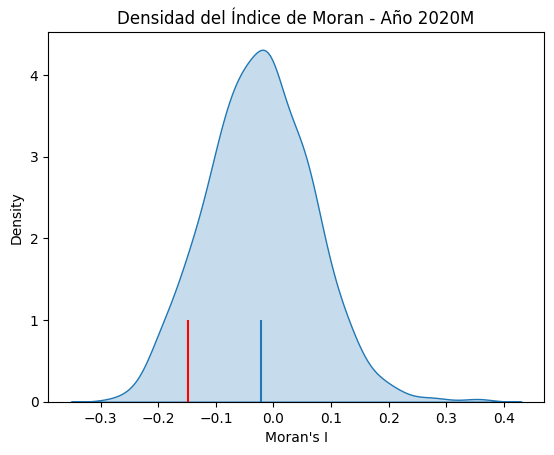

In [241]:


# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Fijar la semilla aleatoria
np.random.seed(12345)

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'b'
    
    # Calcular el índice de Moran
    mi = esda.moran.Moran(y, wq)
    
    # Generar el gráfico de densidad del índice de Moran
    sns.kdeplot(mi.sim, shade=True)
    
    # Agregar líneas verticales para el índice observado (mi.I) y el esperado (mi.EI)
    plt.vlines(mi.I, 0, 1, color='r')
    plt.vlines(mi.EI, 0, 1)
    
    # Configurar etiquetas y título del gráfico
    plt.xlabel("Moran's I")
    plt.title("Densidad del Índice de Moran - Año {}".format(year))
    
    # Mostrar el gráfico
    plt.show()


In [242]:
import numpy as np
import libpysal as lp
import esda

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Fijar la semilla aleatoria
np.random.seed(12345)

# Iterar sobre los años
for year in years:
    # Obtener la columna correspondiente al año
    y = merged[year]
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'b'
    
    # Calcular el estadístico de unión binaria
    yb = 1 * (y > y.median())
    jc = esda.join_counts.Join_Counts(yb, wq)
    
    # Generar los valores simulados
    jc_sim = jc.sim_bb
    
    # Calcular el valor p simulado
    p_sim_bb = (jc_sim >= jc.bb).mean()
    
    # Imprimir los resultados
    print("Año {}: ".format(year))
    print("Uniones externas: {}".format(jc.bb))
    print("Uniones internas: {}".format(jc.ww))
    print("Uniones cruzadas: {}".format(jc.bw))
    print("Valor p simulado (p_sim_bb): {}\n".format(p_sim_bb))


Año 2013M: 
Uniones externas: 27.0
Uniones internas: 45.0
Uniones cruzadas: 39.0
Valor p simulado (p_sim_bb): 0.44044044044044045

Año 2014M: 
Uniones externas: 24.0
Uniones internas: 40.0
Uniones cruzadas: 47.0
Valor p simulado (p_sim_bb): 0.7257257257257257

Año 2015M: 
Uniones externas: 28.0
Uniones internas: 41.0
Uniones cruzadas: 42.0
Valor p simulado (p_sim_bb): 0.3383383383383383

Año 2016M: 
Uniones externas: 23.0
Uniones internas: 40.0
Uniones cruzadas: 48.0
Valor p simulado (p_sim_bb): 0.8328328328328328

Año 2017M: 
Uniones externas: 23.0
Uniones internas: 42.0
Uniones cruzadas: 46.0
Valor p simulado (p_sim_bb): 0.8418418418418419

Año 2018M: 
Uniones externas: 22.0
Uniones internas: 32.0
Uniones cruzadas: 57.0
Valor p simulado (p_sim_bb): 0.9169169169169169

Año 2019M: 
Uniones externas: 27.0
Uniones internas: 37.0
Uniones cruzadas: 47.0
Valor p simulado (p_sim_bb): 0.4084084084084084

Año 2020M: 
Uniones externas: 22.0
Uniones internas: 31.0
Uniones cruzadas: 58.0
Valor p 

PUNTOS CALIENTES

El lag espacial de separación cuantifica la diferencia promedio entre los valores de una variable y los valores promedio de las variables de sus vecinos espaciales. Si el valor del lag de separación es cercano a cero, significa que los valores de una unidad son similares a los valores promedio de sus vecinos. Si el valor del lag de separación es positivo, indica que los valores de una unidad son mayores que los valores promedio de sus vecinos, lo que sugiere una agrupación espacial de valores altos. Por otro lado, si el valor del lag de separación es negativo, indica que los valores de una unidad son menores que los valores promedio de sus vecinos, lo que sugiere una dispersión espacial de valores bajos.


In [245]:
np.random.seed(12345)

In [246]:
import libpysal
import esda

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Iterar sobre los años
for year in years:
    # Obtener los valores correspondientes al año actual
    values = merged[year]
    
    # Crear la matriz de pesos espaciales Queen
    wq = libpysal.weights.Queen.from_dataframe(merged)
    wq.transform = 'r'
    
    # Calcular el lag espacial utilizando el año actual
    lag_separacion = libpysal.weights.lag_spatial(wq, values)
    
    # Mostrar el resultado
    print("Lag de separación para {}: {}".format(year, lag_separacion))



Lag de separación para 2013M: [20.63448237 21.58702552 19.57647744 19.72077399 18.79650345 18.90283364
 20.38056057 19.72066031 19.17717015 20.59825105 18.24100079 17.84536645
 20.54280495 17.2604107  18.52510382 15.7983651  16.29458184 16.56549228
 16.98179161 17.50956181 18.38091836 14.34432273 16.40199452 16.29441924
 15.17381095 18.91595542 23.70056999 24.14479168 21.72685351 19.60215476
 15.03101212 18.10308883 21.72573454 21.7070303  17.50549811 17.91083462
 15.37442113 17.24658697 20.77931479 16.76468135 18.11851529 16.25068405
 17.25599078 17.56282247 17.62891469 17.66669075 19.50159086]
Lag de separación para 2014M: [21.41227204 22.97287376 20.68847066 20.61563093 20.92310288 20.0526368
 22.07681434 21.89847801 24.31282998 21.70304979 22.1222963  19.27790211
 20.83320371 18.50574011 20.01097412 17.72861289 17.80914165 18.39011768
 18.92891544 19.34052753 19.54530417 16.03930683 18.66985833 18.99895996
 16.25614094 19.4755791  26.88851126 29.91300615 22.69427959 23.34907848
 16

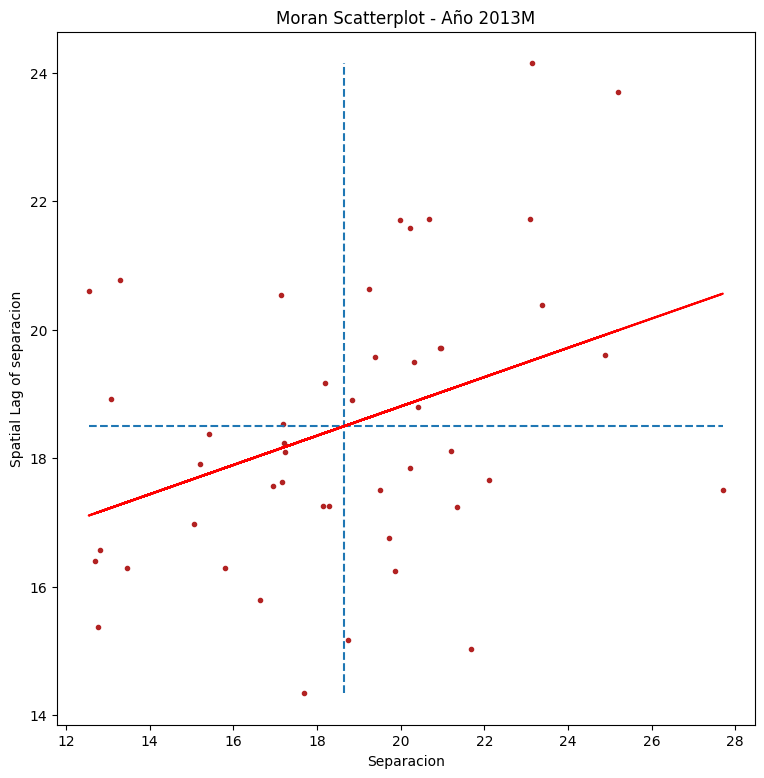

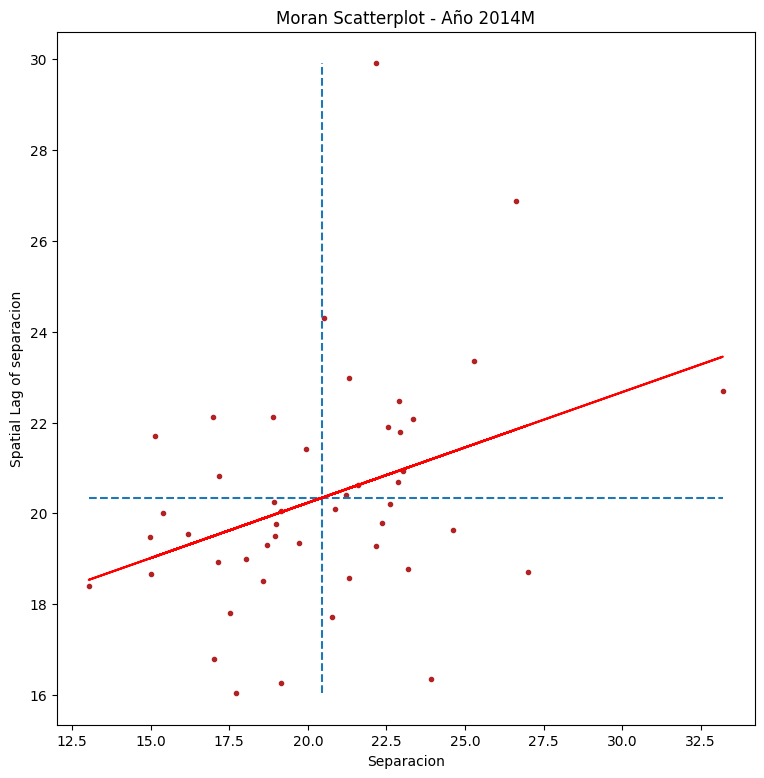

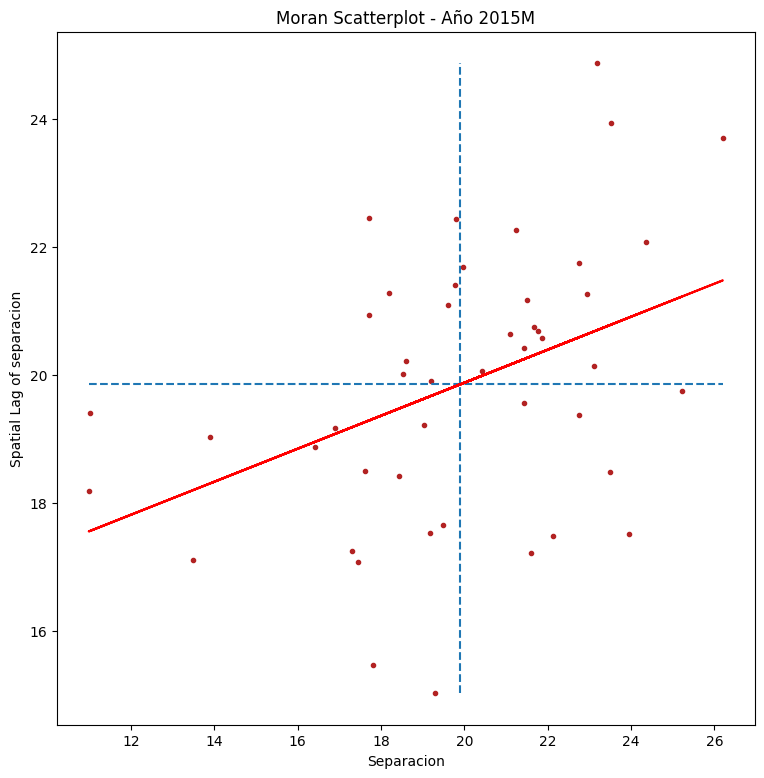

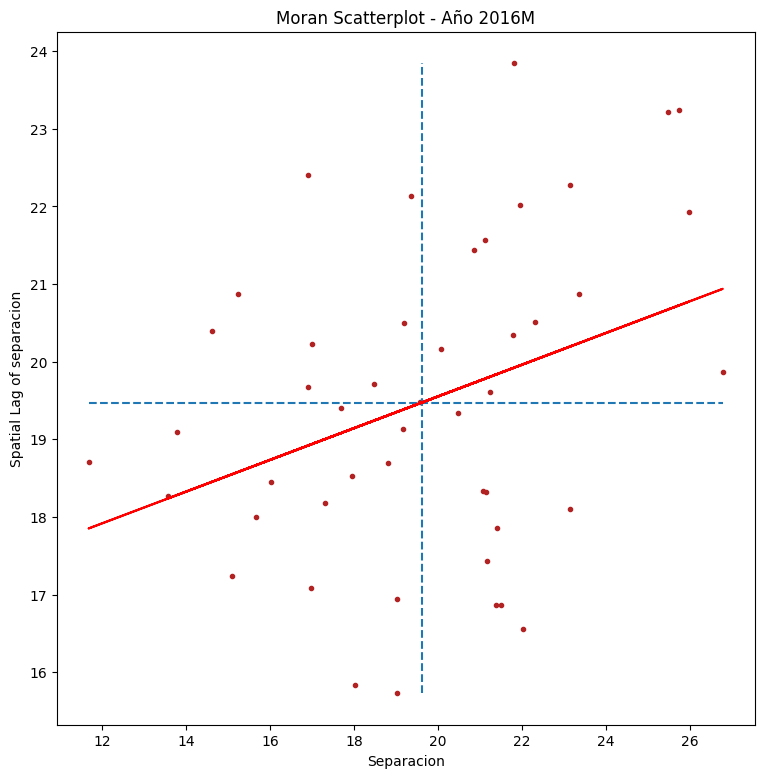

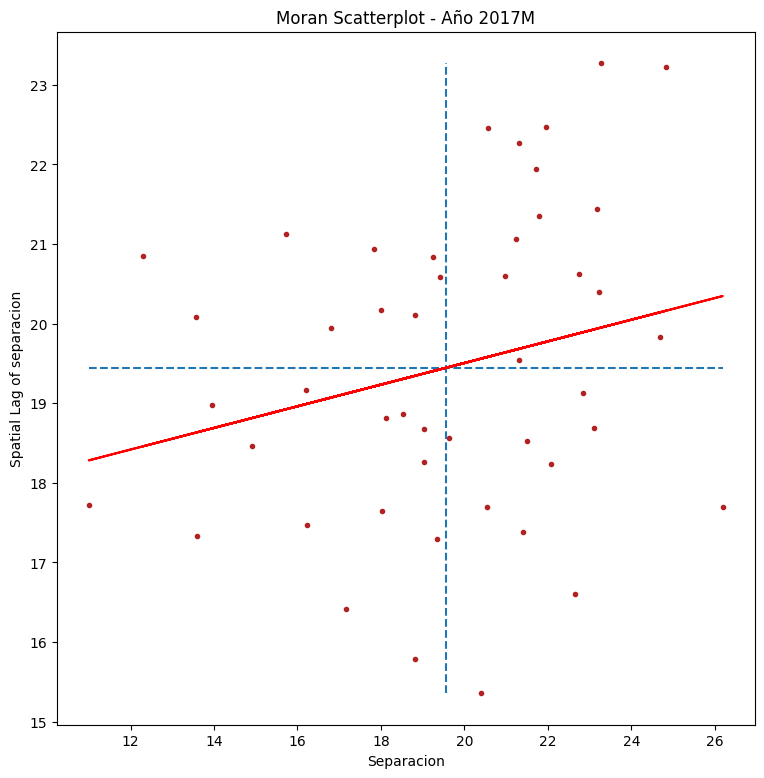

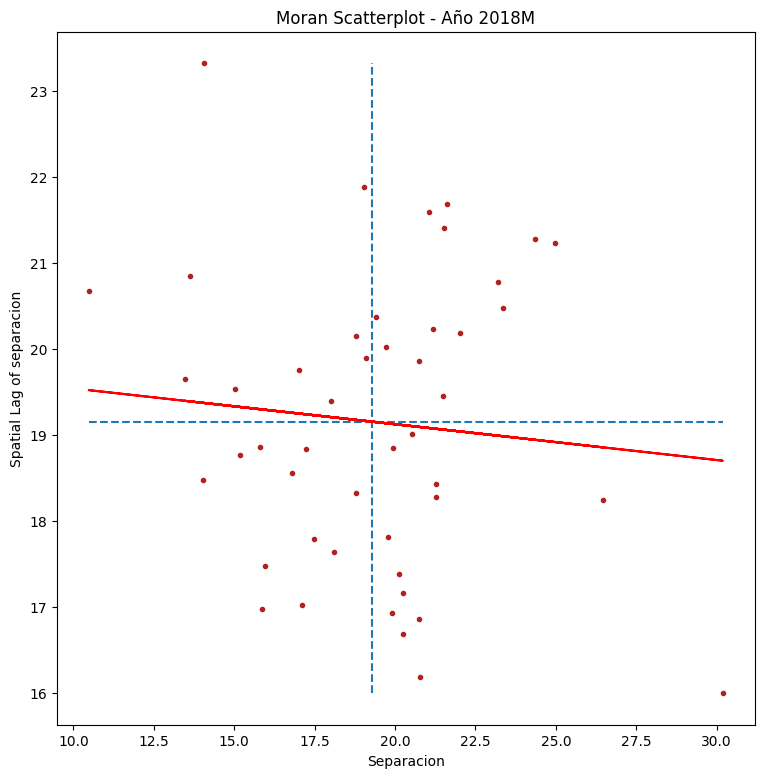

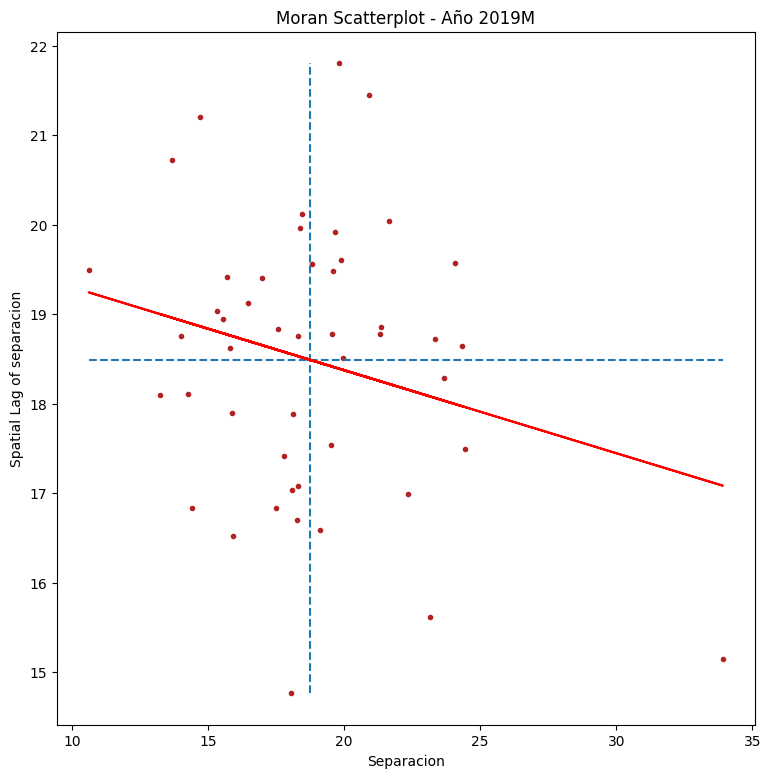

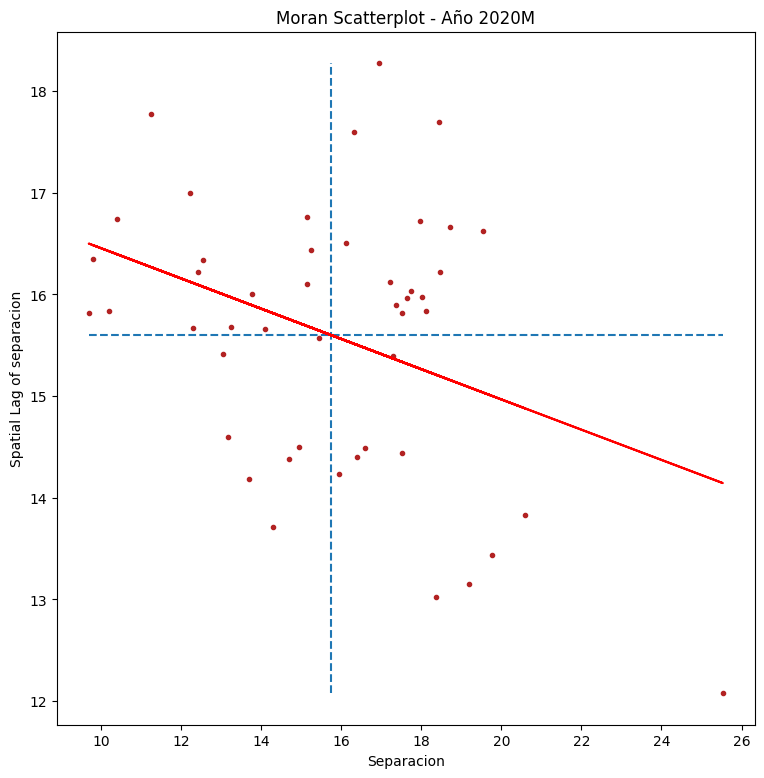

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import libpysal as lp
import esda

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Fijar la semilla aleatoria
np.random.seed(12345)

# Iterar sobre los años
for year in years:
    # Obtener los valores correspondientes al año actual
    separacion = merged[year]
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'r'
    
    # Calcular el lag espacial utilizando el año actual
    lag_separacion = lp.weights.lag_spatial(wq, separacion)
    
    # Calcular la regresión lineal
    b, a = np.polyfit(separacion, lag_separacion, 1)
    
    # Crear la figura y el eje
    f, ax = plt.subplots(1, figsize=(9, 9))
    
    # Graficar los puntos de dispersión
    plt.plot(separacion, lag_separacion, '.', color='firebrick')
    
    # Línea vertical punteada en la media de separacion
    plt.vlines(separacion.mean(), lag_separacion.min(), lag_separacion.max(), linestyle='--')
    
    # Línea horizontal punteada en la media de lag_separacion
    plt.hlines(lag_separacion.mean(), separacion.min(), separacion.max(), linestyle='--')
    
    # Línea de ajuste de color rojo utilizando la regresión lineal
    plt.plot(separacion, a + b*separacion, 'r')
    
    # Configurar títulos y etiquetas de los ejes
    plt.title('Moran Scatterplot - Año {}'.format(year))
    plt.ylabel('Spatial Lag of separacion')
    plt.xlabel('Separacion')
    
    # Mostrar el gráfico
    plt.show()


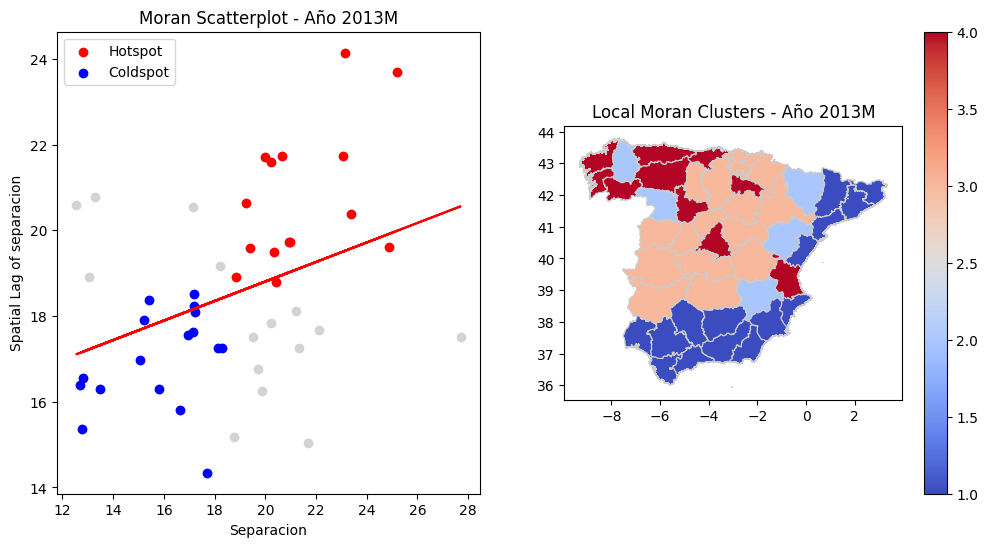

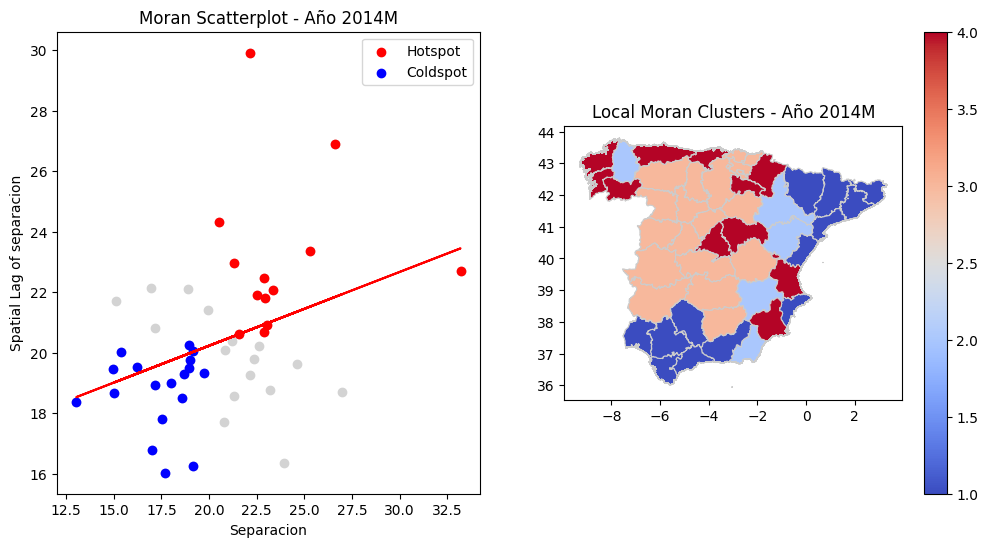

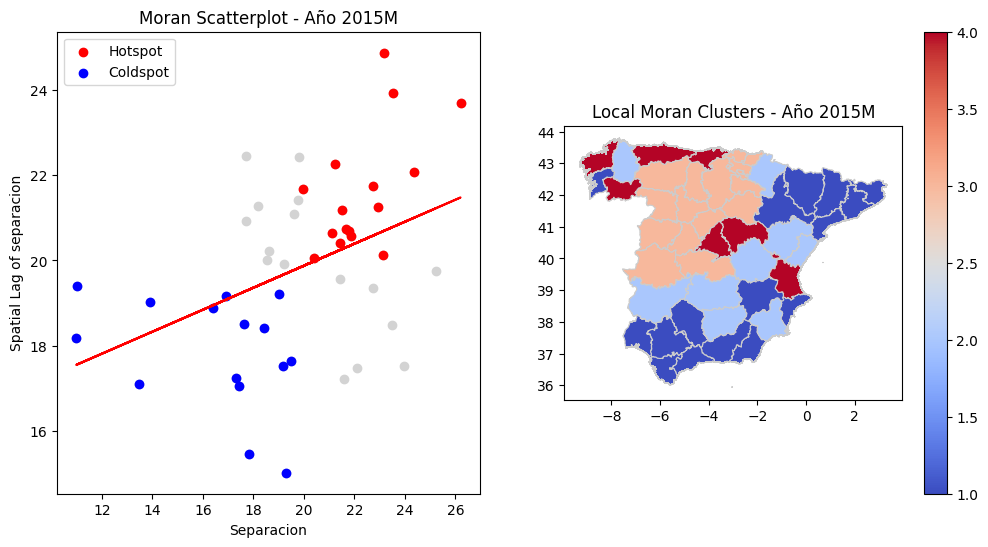

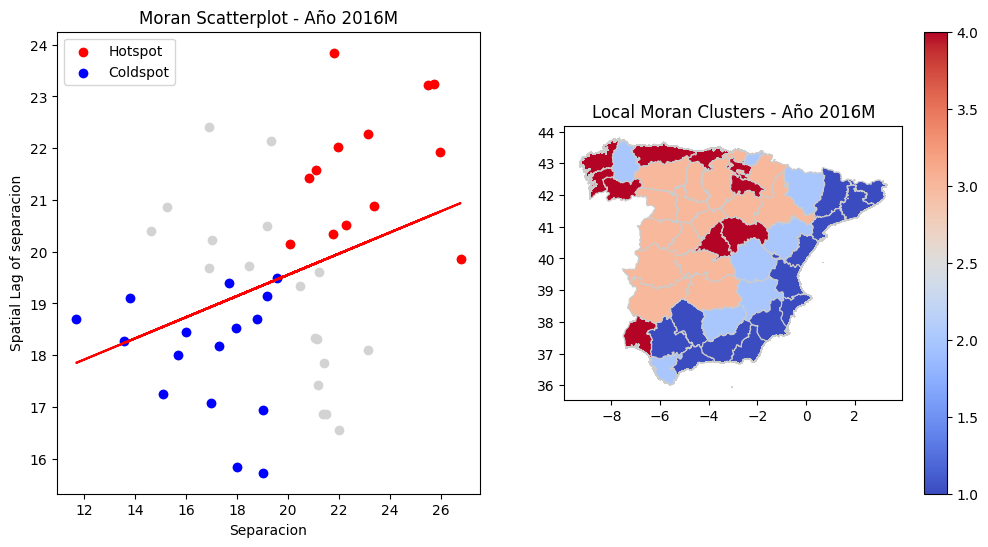

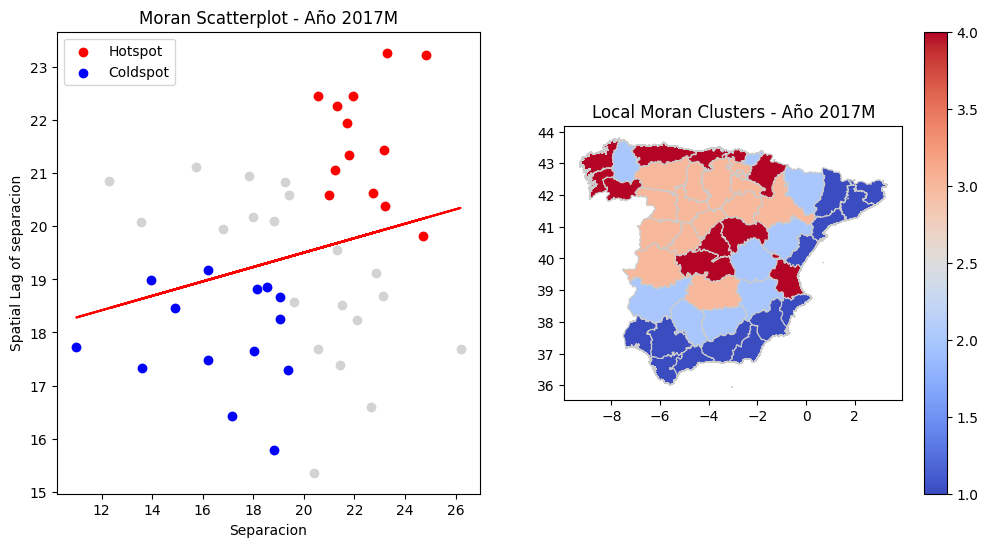

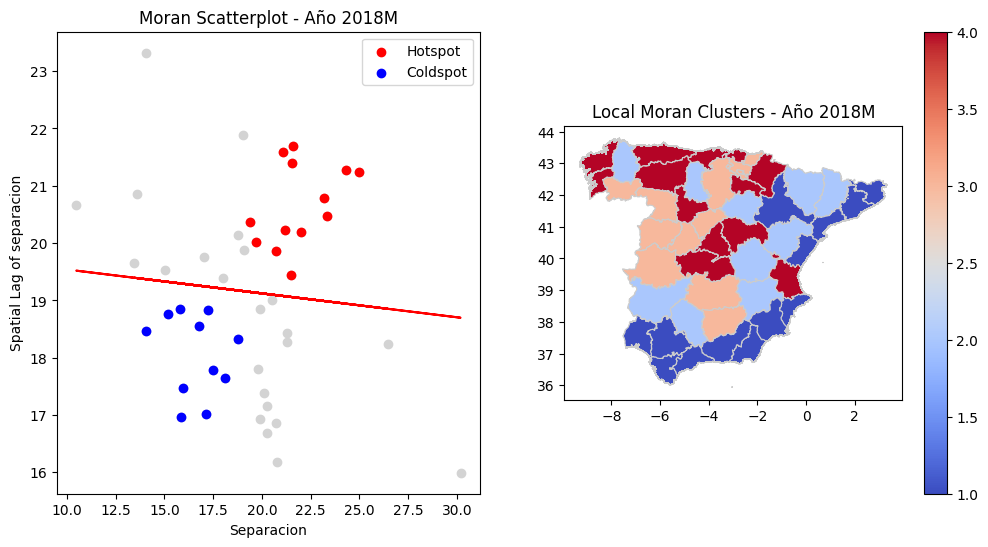

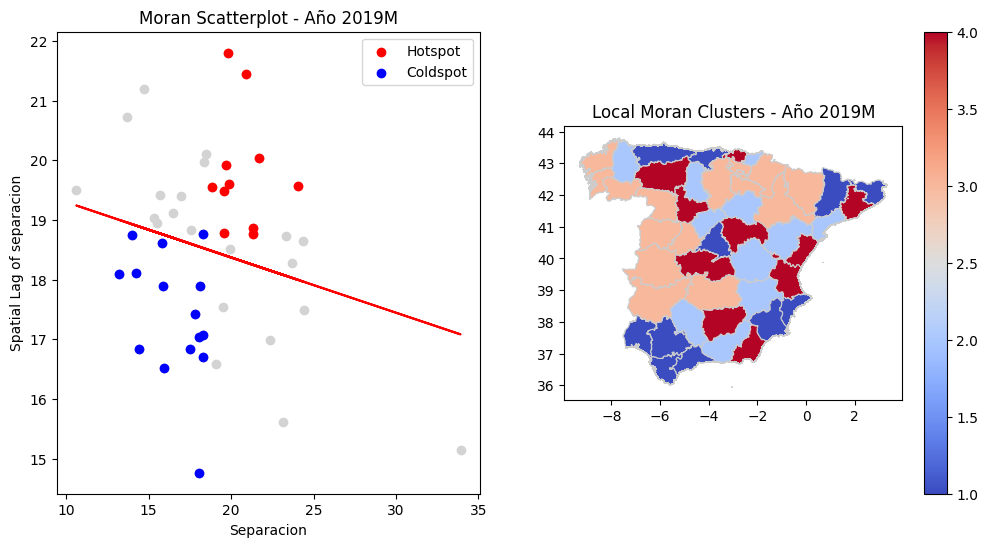

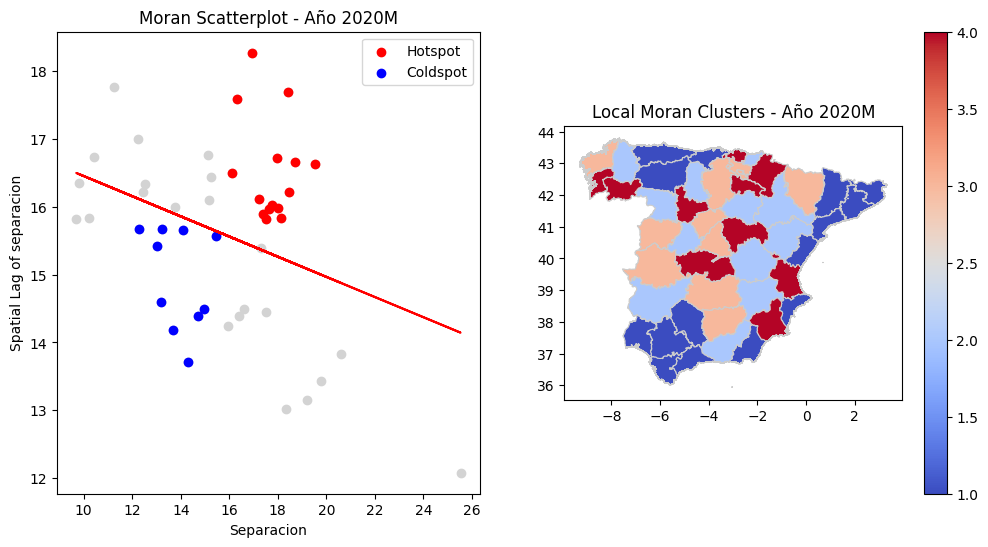

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import libpysal as lp
import esda

# Años a procesar
years = ['2013M', '2014M', '2015M', '2016M', '2017M', '2018M', '2019M', '2020M']

# Fijar la semilla aleatoria
np.random.seed(12345)

# Iterar sobre los años
for year in years:
    # Obtener los valores correspondientes al año actual
    separacion = merged[year]
    
    # Crear la matriz de pesos espaciales Queen
    wq = lp.weights.Queen.from_dataframe(merged)
    wq.transform = 'r'
    
    # Calcular el lag espacial utilizando el año actual
    lag_separacion = lp.weights.lag_spatial(wq, separacion)
    
    # Calcular la regresión lineal
    b, a = np.polyfit(separacion, lag_separacion, 1)
    
    # Calcular la estadística de Moran local (Li y Q)
    moran_loc = esda.moran.Moran_Local(separacion, wq)
    
    # Crear la figura y los ejes
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Graficar los puntos de dispersión con clasificación de Moran local
    sig = moran_loc.p_sim < 0.05
    hotspot = moran_loc.q == 1
    coldspot = moran_loc.q == 3
    ax1.scatter(separacion, lag_separacion, c='lightgray')
    ax1.scatter(separacion[hotspot], lag_separacion[hotspot], c='red', label='Hotspot')
    ax1.scatter(separacion[coldspot], lag_separacion[coldspot], c='blue', label='Coldspot')
    ax1.plot(separacion, a + b*separacion, 'r')
    ax1.legend()
    
    # Graficar el mapa de clusters de Moran local
    merged.assign(clusters=moran_loc.q).plot(column='clusters', cmap='coolwarm', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
    
    # Configurar títulos y etiquetas de los ejes
    ax1.set_title('Moran Scatterplot - Año {}'.format(year))
    ax1.set_ylabel('Spatial Lag of separacion')
    ax1.set_xlabel('Separacion')
    ax2.set_title('Local Moran Clusters - Año {}'.format(year))
    
    # Mostrar los gráficos
    plt.show()
